## compare ssim

In [4]:
import numpy as np
import cv2
from skimage.metrics import structural_similarity

b = cv2.imread(r"D:\Dementia_Data_Preprocessing\testing_data\new_test\mask\20211023_t074252.jpg")
c = cv2.imread(r"D:\Dementia_Data_Preprocessing\testing_data\new_test\mask\20211023_t074254.jpg")

(score, diff) = structural_similarity(b,c, full=True,multichannel=True)
print("SSIM: {}".format(score))


SSIM: 0.6125382467579041


## run path

In [6]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity
import shutil

directory_name = r"D:\Dementia_Data_Preprocessing\testing_data\new_test_4\mask"


list_A = []
list_B = []
num = 0
count = 0
moving_level_list = []
moving_time_list = []
hour_count = 0
hour_count_list = []
dic = {}
for filename in os.listdir(directory_name):
    num = num+1
    
    time = filename.split(".")[0]
    
    
    time2 = time.split("_t")
    
    day = time2[0]
    
    h = int((time2[1])[:2])
    m = int((time2[1])[2:4])
    s = int((time2[1])[4:6])
    
          
    # motion detect start #########################################################
    
    if (num % 2) == 0:
        list_B = []      
        list_B.append(filename)
       
    else:
        list_A = [] 
        list_A.append(filename)
        
    
    
    
    if len(list_A) != 0 and len(list_B) != 0:
        
        #print(list_A,list_B)
        time1 = list_A[0].split(".")[0]       
        time1_2 = time1.split("_t")
        day1 = time1_2[0]
        h1 = int((time1_2[1])[:2])
        m1 = int((time1_2[1])[2:4])
        s1 = int((time1_2[1])[4:6])

        time2 = list_B[0].split(".")[0]       
        time2_2 = time2.split("_t")
        day2 = time2_2[0]
        h2 = int((time2_2[1])[:2])
        m2 = int((time2_2[1])[2:4])
        s2 = int((time2_2[1])[4:6])

        
        a = cv2.imread(directory_name + "\\" + list_A[0])
        b = cv2.imread(directory_name + "\\" + list_B[0])
        (score, diff) = structural_similarity(a,b, full=True,multichannel=True)
        score = round(score,2)
        #print("SSIM: {}".format(score))
        action = 1 - score
        #print("moving level:", action)
        if score < 1:
                    
        
            c = (list_A[0],list_B[0],f"SSIM: {score}")
            print(c)
            
            count = count+1
            moving_level_list.append(1-score)
            
            hour_count+=1
            
            #shutil.copyfile("D:/Dementia_Data_Preprocessing/testing_data/4" + "/" + list_A[0], "D:/motion_detect"+"/"+list_A[0])
            #shutil.copyfile("D:/Dementia_Data_Preprocessing/testing_data/4" + "/" + list_B[0], "D:/motion_detect"+"/"+list_B[0])            
                   
        else:
            hour_count+=0
            moving_level_list.append(0)
            
        if h1 == h2:
            dic[h2] = hour_count                
        elif h1<h2:
            print("!!!!!!!!!")
            dic[h1] = hour_count
            hour_count = 0
        else:
            print("!!!!!!!!!")
            dic[h2] = hour_count
            hour_count = 0
            
        #print(hour_count)
        
      
    else:
        continue
        
    
    ########################################################################################
        
        

print(" ")
print("detect moving times:", count)
print(dic)
print(moving_level_list)

('20211023_t002500.jpg', '20211023_t002502.jpg', 'SSIM: 0.36')
('20211023_t002504.jpg', '20211023_t002502.jpg', 'SSIM: 0.47')
('20211023_t002504.jpg', '20211023_t002506.jpg', 'SSIM: 0.17')
('20211023_t002508.jpg', '20211023_t002506.jpg', 'SSIM: 0.63')
('20211023_t002508.jpg', '20211023_t002510.jpg', 'SSIM: 0.93')
('20211023_t002512.jpg', '20211023_t002510.jpg', 'SSIM: 0.83')
('20211023_t002512.jpg', '20211023_t002514.jpg', 'SSIM: 0.42')
('20211023_t002516.jpg', '20211023_t002514.jpg', 'SSIM: 0.5')
('20211023_t002516.jpg', '20211023_t002518.jpg', 'SSIM: 0.66')
('20211023_t002520.jpg', '20211023_t002518.jpg', 'SSIM: 0.75')
('20211023_t002520.jpg', '20211023_t002522.jpg', 'SSIM: 0.74')
('20211023_t002524.jpg', '20211023_t002522.jpg', 'SSIM: 0.79')
('20211023_t002524.jpg', '20211023_t002526.jpg', 'SSIM: 0.56')
('20211023_t002528.jpg', '20211023_t002526.jpg', 'SSIM: 0.54')
('20211023_t002528.jpg', '20211023_t002530.jpg', 'SSIM: 0.48')
('20211023_t002532.jpg', '20211023_t002530.jpg', 'SSIM: 

('20211023_t003040.jpg', '20211023_t003038.jpg', 'SSIM: 0.86')
('20211023_t003040.jpg', '20211023_t003042.jpg', 'SSIM: 0.83')
('20211023_t003044.jpg', '20211023_t003042.jpg', 'SSIM: 0.95')
('20211023_t003044.jpg', '20211023_t003046.jpg', 'SSIM: 0.87')
('20211023_t003048.jpg', '20211023_t003046.jpg', 'SSIM: 0.98')
('20211023_t003048.jpg', '20211023_t003050.jpg', 'SSIM: 0.92')
('20211023_t003052.jpg', '20211023_t003050.jpg', 'SSIM: 0.99')
('20211023_t003052.jpg', '20211023_t003054.jpg', 'SSIM: 0.94')
('20211023_t003056.jpg', '20211023_t003054.jpg', 'SSIM: 0.83')
('20211023_t003056.jpg', '20211023_t003058.jpg', 'SSIM: 0.81')
('20211023_t003100.jpg', '20211023_t003058.jpg', 'SSIM: 0.91')
('20211023_t003100.jpg', '20211023_t003102.jpg', 'SSIM: 0.93')
('20211023_t003104.jpg', '20211023_t003102.jpg', 'SSIM: 0.89')
('20211023_t003104.jpg', '20211023_t003106.jpg', 'SSIM: 0.86')
('20211023_t003108.jpg', '20211023_t003106.jpg', 'SSIM: 0.83')
('20211023_t003108.jpg', '20211023_t003110.jpg', 'SSIM:

('20211023_t003536.jpg', '20211023_t003534.jpg', 'SSIM: 0.96')
('20211023_t003536.jpg', '20211023_t003538.jpg', 'SSIM: 0.91')
('20211023_t003540.jpg', '20211023_t003538.jpg', 'SSIM: 0.92')
('20211023_t003540.jpg', '20211023_t003542.jpg', 'SSIM: 0.85')
('20211023_t003544.jpg', '20211023_t003542.jpg', 'SSIM: 0.86')
('20211023_t003544.jpg', '20211023_t003546.jpg', 'SSIM: 0.95')
('20211023_t003548.jpg', '20211023_t003546.jpg', 'SSIM: 0.89')
('20211023_t003548.jpg', '20211023_t003550.jpg', 'SSIM: 0.92')
('20211023_t003552.jpg', '20211023_t003550.jpg', 'SSIM: 0.98')
('20211023_t003552.jpg', '20211023_t003554.jpg', 'SSIM: 0.94')
('20211023_t003556.jpg', '20211023_t003554.jpg', 'SSIM: 0.96')
('20211023_t003556.jpg', '20211023_t003558.jpg', 'SSIM: 0.94')
('20211023_t003600.jpg', '20211023_t003558.jpg', 'SSIM: 0.85')
('20211023_t003600.jpg', '20211023_t003602.jpg', 'SSIM: 0.82')
('20211023_t003604.jpg', '20211023_t003602.jpg', 'SSIM: 0.94')
('20211023_t003604.jpg', '20211023_t003606.jpg', 'SSIM:

('20211023_t004016.jpg', '20211023_t004014.jpg', 'SSIM: 0.97')
('20211023_t004016.jpg', '20211023_t004018.jpg', 'SSIM: 0.88')
('20211023_t004020.jpg', '20211023_t004018.jpg', 'SSIM: 0.96')
('20211023_t004020.jpg', '20211023_t004022.jpg', 'SSIM: 0.89')
('20211023_t004024.jpg', '20211023_t004022.jpg', 'SSIM: 0.93')
('20211023_t004024.jpg', '20211023_t004026.jpg', 'SSIM: 0.88')
('20211023_t004028.jpg', '20211023_t004026.jpg', 'SSIM: 0.83')
('20211023_t004028.jpg', '20211023_t004030.jpg', 'SSIM: 0.92')
('20211023_t004032.jpg', '20211023_t004030.jpg', 'SSIM: 0.86')
('20211023_t004032.jpg', '20211023_t004034.jpg', 'SSIM: 0.92')
('20211023_t004036.jpg', '20211023_t004034.jpg', 'SSIM: 0.92')
('20211023_t004036.jpg', '20211023_t004038.jpg', 'SSIM: 0.94')
('20211023_t004040.jpg', '20211023_t004038.jpg', 'SSIM: 0.94')
('20211023_t004040.jpg', '20211023_t004042.jpg', 'SSIM: 0.99')
('20211023_t004044.jpg', '20211023_t004042.jpg', 'SSIM: 0.93')
('20211023_t004044.jpg', '20211023_t004046.jpg', 'SSIM:

('20211023_t004604.jpg', '20211023_t004606.jpg', 'SSIM: 0.91')
('20211023_t004608.jpg', '20211023_t004606.jpg', 'SSIM: 0.91')
('20211023_t004608.jpg', '20211023_t004610.jpg', 'SSIM: 0.89')
('20211023_t004612.jpg', '20211023_t004610.jpg', 'SSIM: 0.91')
('20211023_t004612.jpg', '20211023_t004614.jpg', 'SSIM: 0.84')
('20211023_t004616.jpg', '20211023_t004614.jpg', 'SSIM: 0.47')
('20211023_t004616.jpg', '20211023_t004618.jpg', 'SSIM: 0.58')
('20211023_t004620.jpg', '20211023_t004618.jpg', 'SSIM: 0.69')
('20211023_t004620.jpg', '20211023_t004622.jpg', 'SSIM: 0.89')
('20211023_t004624.jpg', '20211023_t004622.jpg', 'SSIM: 0.76')
('20211023_t004624.jpg', '20211023_t004626.jpg', 'SSIM: 0.77')
('20211023_t004628.jpg', '20211023_t004626.jpg', 'SSIM: 0.85')
('20211023_t004628.jpg', '20211023_t004630.jpg', 'SSIM: 0.91')
('20211023_t004632.jpg', '20211023_t004630.jpg', 'SSIM: 0.85')
('20211023_t004632.jpg', '20211023_t004634.jpg', 'SSIM: 0.86')
('20211023_t004636.jpg', '20211023_t004634.jpg', 'SSIM:

('20211023_t005128.jpg', '20211023_t005126.jpg', 'SSIM: 0.95')
('20211023_t005128.jpg', '20211023_t005130.jpg', 'SSIM: 0.92')
('20211023_t005132.jpg', '20211023_t005130.jpg', 'SSIM: 0.88')
('20211023_t005132.jpg', '20211023_t005134.jpg', 'SSIM: 0.86')
('20211023_t005136.jpg', '20211023_t005134.jpg', 'SSIM: 0.91')
('20211023_t005136.jpg', '20211023_t005138.jpg', 'SSIM: 0.94')
('20211023_t005140.jpg', '20211023_t005138.jpg', 'SSIM: 0.99')
('20211023_t005140.jpg', '20211023_t005142.jpg', 'SSIM: 0.93')
('20211023_t005144.jpg', '20211023_t005142.jpg', 'SSIM: 0.95')
('20211023_t005144.jpg', '20211023_t005146.jpg', 'SSIM: 0.89')
('20211023_t005148.jpg', '20211023_t005146.jpg', 'SSIM: 0.84')
('20211023_t005148.jpg', '20211023_t005150.jpg', 'SSIM: 0.77')
('20211023_t005152.jpg', '20211023_t005150.jpg', 'SSIM: 0.89')
('20211023_t005152.jpg', '20211023_t005154.jpg', 'SSIM: 0.92')
('20211023_t005156.jpg', '20211023_t005154.jpg', 'SSIM: 0.89')
('20211023_t005156.jpg', '20211023_t005158.jpg', 'SSIM:

('20211023_t005720.jpg', '20211023_t005718.jpg', 'SSIM: 0.98')
('20211023_t005720.jpg', '20211023_t005722.jpg', 'SSIM: 0.94')
('20211023_t005724.jpg', '20211023_t005722.jpg', 'SSIM: 0.94')
('20211023_t005724.jpg', '20211023_t005726.jpg', 'SSIM: 0.57')
('20211023_t005728.jpg', '20211023_t005726.jpg', 'SSIM: 0.47')
('20211023_t005728.jpg', '20211023_t005730.jpg', 'SSIM: 0.93')
('20211023_t005732.jpg', '20211023_t005730.jpg', 'SSIM: 0.44')
('20211023_t005732.jpg', '20211023_t005734.jpg', 'SSIM: 0.73')
('20211023_t005736.jpg', '20211023_t005734.jpg', 'SSIM: 0.59')
('20211023_t005736.jpg', '20211023_t005738.jpg', 'SSIM: 0.56')
('20211023_t005740.jpg', '20211023_t005738.jpg', 'SSIM: 0.52')
('20211023_t005740.jpg', '20211023_t005742.jpg', 'SSIM: 0.73')
('20211023_t005744.jpg', '20211023_t005742.jpg', 'SSIM: 0.96')
('20211023_t005744.jpg', '20211023_t005746.jpg', 'SSIM: 0.78')
('20211023_t005748.jpg', '20211023_t005746.jpg', 'SSIM: 0.76')
('20211023_t005748.jpg', '20211023_t005750.jpg', 'SSIM:

('20211023_t010236.jpg', '20211023_t010238.jpg', 'SSIM: 0.81')
('20211023_t010240.jpg', '20211023_t010238.jpg', 'SSIM: 0.78')
('20211023_t010240.jpg', '20211023_t010242.jpg', 'SSIM: 0.92')
('20211023_t010244.jpg', '20211023_t010242.jpg', 'SSIM: 0.75')
('20211023_t010244.jpg', '20211023_t010246.jpg', 'SSIM: 0.7')
('20211023_t010248.jpg', '20211023_t010246.jpg', 'SSIM: 0.88')
('20211023_t010248.jpg', '20211023_t010250.jpg', 'SSIM: 0.79')
('20211023_t010252.jpg', '20211023_t010250.jpg', 'SSIM: 0.9')
('20211023_t010252.jpg', '20211023_t010254.jpg', 'SSIM: 0.92')
('20211023_t010256.jpg', '20211023_t010254.jpg', 'SSIM: 0.86')
('20211023_t010256.jpg', '20211023_t010258.jpg', 'SSIM: 0.87')
('20211023_t010300.jpg', '20211023_t010258.jpg', 'SSIM: 0.84')
('20211023_t010300.jpg', '20211023_t010302.jpg', 'SSIM: 0.86')
('20211023_t010304.jpg', '20211023_t010302.jpg', 'SSIM: 0.86')
('20211023_t010304.jpg', '20211023_t010306.jpg', 'SSIM: 0.87')
('20211023_t010308.jpg', '20211023_t010306.jpg', 'SSIM: 0

('20211023_t010718.jpg', '20211023_t010716.jpg', 'SSIM: 0.88')
('20211023_t010718.jpg', '20211023_t010720.jpg', 'SSIM: 0.94')
('20211023_t010722.jpg', '20211023_t010720.jpg', 'SSIM: 0.95')
('20211023_t010722.jpg', '20211023_t010724.jpg', 'SSIM: 0.9')
('20211023_t010726.jpg', '20211023_t010724.jpg', 'SSIM: 0.93')
('20211023_t010726.jpg', '20211023_t010728.jpg', 'SSIM: 0.92')
('20211023_t010730.jpg', '20211023_t010728.jpg', 'SSIM: 0.85')
('20211023_t010730.jpg', '20211023_t010732.jpg', 'SSIM: 0.78')
('20211023_t010734.jpg', '20211023_t010732.jpg', 'SSIM: 0.66')
('20211023_t010734.jpg', '20211023_t010736.jpg', 'SSIM: 0.77')
('20211023_t010738.jpg', '20211023_t010736.jpg', 'SSIM: 0.82')
('20211023_t010738.jpg', '20211023_t010740.jpg', 'SSIM: 0.82')
('20211023_t010742.jpg', '20211023_t010740.jpg', 'SSIM: 0.9')
('20211023_t010742.jpg', '20211023_t010744.jpg', 'SSIM: 0.87')
('20211023_t010746.jpg', '20211023_t010744.jpg', 'SSIM: 0.75')
('20211023_t010746.jpg', '20211023_t010748.jpg', 'SSIM: 0

('20211023_t011240.jpg', '20211023_t011242.jpg', 'SSIM: 0.96')
('20211023_t011244.jpg', '20211023_t011242.jpg', 'SSIM: 0.9')
('20211023_t011244.jpg', '20211023_t011246.jpg', 'SSIM: 0.72')
('20211023_t011248.jpg', '20211023_t011246.jpg', 'SSIM: 0.7')
('20211023_t011248.jpg', '20211023_t011250.jpg', 'SSIM: 0.93')
('20211023_t011252.jpg', '20211023_t011250.jpg', 'SSIM: 0.82')
('20211023_t011252.jpg', '20211023_t011254.jpg', 'SSIM: 0.76')
('20211023_t011256.jpg', '20211023_t011254.jpg', 'SSIM: 0.99')
('20211023_t011256.jpg', '20211023_t011258.jpg', 'SSIM: 0.73')
('20211023_t011300.jpg', '20211023_t011258.jpg', 'SSIM: 0.71')
('20211023_t011300.jpg', '20211023_t011302.jpg', 'SSIM: 0.68')
('20211023_t011304.jpg', '20211023_t011302.jpg', 'SSIM: 0.62')
('20211023_t011304.jpg', '20211023_t011306.jpg', 'SSIM: 0.57')
('20211023_t011308.jpg', '20211023_t011306.jpg', 'SSIM: 0.58')
('20211023_t011308.jpg', '20211023_t011310.jpg', 'SSIM: 0.96')
('20211023_t011312.jpg', '20211023_t011310.jpg', 'SSIM: 0

('20211023_t011804.jpg', '20211023_t011806.jpg', 'SSIM: 0.83')
('20211023_t011808.jpg', '20211023_t011806.jpg', 'SSIM: 0.92')
('20211023_t011808.jpg', '20211023_t011810.jpg', 'SSIM: 0.93')
('20211023_t011812.jpg', '20211023_t011810.jpg', 'SSIM: 0.94')
('20211023_t011812.jpg', '20211023_t011814.jpg', 'SSIM: 0.93')
('20211023_t011816.jpg', '20211023_t011814.jpg', 'SSIM: 0.95')
('20211023_t011816.jpg', '20211023_t011818.jpg', 'SSIM: 0.8')
('20211023_t011820.jpg', '20211023_t011818.jpg', 'SSIM: 0.85')
('20211023_t011820.jpg', '20211023_t011822.jpg', 'SSIM: 0.9')
('20211023_t011824.jpg', '20211023_t011822.jpg', 'SSIM: 0.96')
('20211023_t011824.jpg', '20211023_t011826.jpg', 'SSIM: 0.94')
('20211023_t011828.jpg', '20211023_t011826.jpg', 'SSIM: 0.96')
('20211023_t011828.jpg', '20211023_t011830.jpg', 'SSIM: 0.42')
('20211023_t011832.jpg', '20211023_t011830.jpg', 'SSIM: 0.64')
('20211023_t011832.jpg', '20211023_t011834.jpg', 'SSIM: 0.74')
('20211023_t011836.jpg', '20211023_t011834.jpg', 'SSIM: 0

('20211023_t012256.jpg', '20211023_t012254.jpg', 'SSIM: 0.81')
('20211023_t012256.jpg', '20211023_t012258.jpg', 'SSIM: 0.85')
('20211023_t012300.jpg', '20211023_t012258.jpg', 'SSIM: 0.82')
('20211023_t012300.jpg', '20211023_t012302.jpg', 'SSIM: 0.84')
('20211023_t012304.jpg', '20211023_t012302.jpg', 'SSIM: 0.84')
('20211023_t012304.jpg', '20211023_t012306.jpg', 'SSIM: 0.95')
('20211023_t012308.jpg', '20211023_t012306.jpg', 'SSIM: 0.92')
('20211023_t012308.jpg', '20211023_t012310.jpg', 'SSIM: 0.83')
('20211023_t012312.jpg', '20211023_t012310.jpg', 'SSIM: 0.84')
('20211023_t012312.jpg', '20211023_t012314.jpg', 'SSIM: 0.86')
('20211023_t012316.jpg', '20211023_t012314.jpg', 'SSIM: 0.82')
('20211023_t012316.jpg', '20211023_t012318.jpg', 'SSIM: 0.89')
('20211023_t012320.jpg', '20211023_t012318.jpg', 'SSIM: 0.84')
('20211023_t012320.jpg', '20211023_t012322.jpg', 'SSIM: 0.83')
('20211023_t012324.jpg', '20211023_t012322.jpg', 'SSIM: 0.9')
('20211023_t012324.jpg', '20211023_t012326.jpg', 'SSIM: 

('20211023_t012752.jpg', '20211023_t012754.jpg', 'SSIM: 0.88')
('20211023_t012756.jpg', '20211023_t012754.jpg', 'SSIM: 0.79')
('20211023_t012756.jpg', '20211023_t012758.jpg', 'SSIM: 0.86')
('20211023_t012800.jpg', '20211023_t012758.jpg', 'SSIM: 0.85')
('20211023_t012800.jpg', '20211023_t012802.jpg', 'SSIM: 0.81')
('20211023_t012804.jpg', '20211023_t012802.jpg', 'SSIM: 0.82')
('20211023_t012804.jpg', '20211023_t012806.jpg', 'SSIM: 0.77')
('20211023_t012808.jpg', '20211023_t012806.jpg', 'SSIM: 0.84')
('20211023_t012808.jpg', '20211023_t012810.jpg', 'SSIM: 0.86')
('20211023_t012812.jpg', '20211023_t012810.jpg', 'SSIM: 0.74')
('20211023_t012812.jpg', '20211023_t012814.jpg', 'SSIM: 0.8')
('20211023_t012816.jpg', '20211023_t012814.jpg', 'SSIM: 0.82')
('20211023_t012816.jpg', '20211023_t012818.jpg', 'SSIM: 0.93')
('20211023_t012820.jpg', '20211023_t012818.jpg', 'SSIM: 0.86')
('20211023_t012820.jpg', '20211023_t012822.jpg', 'SSIM: 0.91')
('20211023_t012824.jpg', '20211023_t012822.jpg', 'SSIM: 

('20211023_t013232.jpg', '20211023_t013234.jpg', 'SSIM: 0.83')
('20211023_t013236.jpg', '20211023_t013234.jpg', 'SSIM: 0.71')
('20211023_t013236.jpg', '20211023_t013238.jpg', 'SSIM: 0.76')
('20211023_t013240.jpg', '20211023_t013238.jpg', 'SSIM: 0.52')
('20211023_t013240.jpg', '20211023_t013242.jpg', 'SSIM: 0.53')
('20211023_t013244.jpg', '20211023_t013242.jpg', 'SSIM: 0.76')
('20211023_t013244.jpg', '20211023_t013246.jpg', 'SSIM: 0.77')
('20211023_t013248.jpg', '20211023_t013246.jpg', 'SSIM: 0.7')
('20211023_t013248.jpg', '20211023_t013250.jpg', 'SSIM: 0.37')
('20211023_t013252.jpg', '20211023_t013250.jpg', 'SSIM: 0.62')
('20211023_t013252.jpg', '20211023_t013254.jpg', 'SSIM: 0.6')
('20211023_t013256.jpg', '20211023_t013254.jpg', 'SSIM: 0.83')
('20211023_t013256.jpg', '20211023_t013258.jpg', 'SSIM: 0.78')
('20211023_t013300.jpg', '20211023_t013258.jpg', 'SSIM: 0.82')
('20211023_t013300.jpg', '20211023_t013302.jpg', 'SSIM: 0.7')
('20211023_t013304.jpg', '20211023_t013302.jpg', 'SSIM: 0.

('20211023_t013800.jpg', '20211023_t013758.jpg', 'SSIM: 0.59')
('20211023_t013800.jpg', '20211023_t013802.jpg', 'SSIM: 0.77')
('20211023_t013804.jpg', '20211023_t013802.jpg', 'SSIM: 0.85')
('20211023_t013804.jpg', '20211023_t013806.jpg', 'SSIM: 0.54')
('20211023_t013808.jpg', '20211023_t013806.jpg', 'SSIM: 0.58')
('20211023_t013808.jpg', '20211023_t013810.jpg', 'SSIM: 0.85')
('20211023_t013812.jpg', '20211023_t013810.jpg', 'SSIM: 0.79')
('20211023_t013812.jpg', '20211023_t013814.jpg', 'SSIM: 0.74')
('20211023_t013816.jpg', '20211023_t013814.jpg', 'SSIM: 0.73')
('20211023_t013816.jpg', '20211023_t013818.jpg', 'SSIM: 0.49')
('20211023_t013820.jpg', '20211023_t013818.jpg', 'SSIM: 0.54')
('20211023_t013820.jpg', '20211023_t013822.jpg', 'SSIM: 0.74')
('20211023_t013824.jpg', '20211023_t013822.jpg', 'SSIM: 0.55')
('20211023_t013824.jpg', '20211023_t013826.jpg', 'SSIM: 0.53')
('20211023_t013828.jpg', '20211023_t013826.jpg', 'SSIM: 0.72')
('20211023_t013828.jpg', '20211023_t013830.jpg', 'SSIM:

('20211023_t014332.jpg', '20211023_t014334.jpg', 'SSIM: 0.76')
('20211023_t014336.jpg', '20211023_t014334.jpg', 'SSIM: 0.33')
('20211023_t014336.jpg', '20211023_t014338.jpg', 'SSIM: 0.57')
('20211023_t014340.jpg', '20211023_t014338.jpg', 'SSIM: 0.62')
('20211023_t014340.jpg', '20211023_t014342.jpg', 'SSIM: 0.61')
('20211023_t014344.jpg', '20211023_t014342.jpg', 'SSIM: 0.69')
('20211023_t014344.jpg', '20211023_t014346.jpg', 'SSIM: 0.76')
('20211023_t014348.jpg', '20211023_t014346.jpg', 'SSIM: 0.73')
('20211023_t014348.jpg', '20211023_t014350.jpg', 'SSIM: 0.51')
('20211023_t014352.jpg', '20211023_t014350.jpg', 'SSIM: 0.44')
('20211023_t014352.jpg', '20211023_t014354.jpg', 'SSIM: 0.47')
('20211023_t014356.jpg', '20211023_t014354.jpg', 'SSIM: 0.51')
('20211023_t014356.jpg', '20211023_t014358.jpg', 'SSIM: 0.66')
('20211023_t014400.jpg', '20211023_t014358.jpg', 'SSIM: 0.59')
('20211023_t014400.jpg', '20211023_t014402.jpg', 'SSIM: 0.47')
('20211023_t014404.jpg', '20211023_t014402.jpg', 'SSIM:

('20211023_t014904.jpg', '20211023_t014906.jpg', 'SSIM: 0.7')
('20211023_t014908.jpg', '20211023_t014906.jpg', 'SSIM: 0.68')
('20211023_t014908.jpg', '20211023_t014910.jpg', 'SSIM: 0.59')
('20211023_t014912.jpg', '20211023_t014910.jpg', 'SSIM: 0.76')
('20211023_t014912.jpg', '20211023_t014914.jpg', 'SSIM: 0.77')
('20211023_t014916.jpg', '20211023_t014914.jpg', 'SSIM: 0.51')
('20211023_t014916.jpg', '20211023_t014918.jpg', 'SSIM: 0.63')
('20211023_t014920.jpg', '20211023_t014918.jpg', 'SSIM: 0.43')
('20211023_t014920.jpg', '20211023_t014922.jpg', 'SSIM: 0.72')
('20211023_t014924.jpg', '20211023_t014922.jpg', 'SSIM: 0.73')
('20211023_t014924.jpg', '20211023_t014926.jpg', 'SSIM: 0.8')
('20211023_t014928.jpg', '20211023_t014926.jpg', 'SSIM: 0.64')
('20211023_t014928.jpg', '20211023_t014930.jpg', 'SSIM: 0.91')
('20211023_t014932.jpg', '20211023_t014930.jpg', 'SSIM: 0.57')
('20211023_t014932.jpg', '20211023_t014934.jpg', 'SSIM: 0.6')
('20211023_t014936.jpg', '20211023_t014934.jpg', 'SSIM: 0.

('20211023_t015432.jpg', '20211023_t015430.jpg', 'SSIM: 0.59')
('20211023_t015432.jpg', '20211023_t015434.jpg', 'SSIM: 0.65')
('20211023_t015436.jpg', '20211023_t015434.jpg', 'SSIM: 0.64')
('20211023_t015436.jpg', '20211023_t015438.jpg', 'SSIM: 0.68')
('20211023_t015440.jpg', '20211023_t015438.jpg', 'SSIM: 0.59')
('20211023_t015440.jpg', '20211023_t015442.jpg', 'SSIM: 0.49')
('20211023_t015444.jpg', '20211023_t015442.jpg', 'SSIM: 0.45')
('20211023_t015444.jpg', '20211023_t015446.jpg', 'SSIM: 0.59')
('20211023_t015448.jpg', '20211023_t015446.jpg', 'SSIM: 0.61')
('20211023_t015448.jpg', '20211023_t015450.jpg', 'SSIM: 0.56')
('20211023_t015452.jpg', '20211023_t015450.jpg', 'SSIM: 0.79')
('20211023_t015452.jpg', '20211023_t015454.jpg', 'SSIM: 0.63')
('20211023_t015456.jpg', '20211023_t015454.jpg', 'SSIM: 0.73')
('20211023_t015456.jpg', '20211023_t015458.jpg', 'SSIM: 0.51')
('20211023_t015500.jpg', '20211023_t015458.jpg', 'SSIM: 0.68')
('20211023_t015500.jpg', '20211023_t015502.jpg', 'SSIM:

('20211023_t020006.jpg', '20211023_t020004.jpg', 'SSIM: 0.44')
('20211023_t020006.jpg', '20211023_t020008.jpg', 'SSIM: 0.8')
('20211023_t020010.jpg', '20211023_t020008.jpg', 'SSIM: 0.6')
('20211023_t020010.jpg', '20211023_t020012.jpg', 'SSIM: 0.69')
('20211023_t020014.jpg', '20211023_t020012.jpg', 'SSIM: 0.46')
('20211023_t020014.jpg', '20211023_t020016.jpg', 'SSIM: 0.6')
('20211023_t020018.jpg', '20211023_t020016.jpg', 'SSIM: 0.6')
('20211023_t020018.jpg', '20211023_t020020.jpg', 'SSIM: 0.56')
('20211023_t020022.jpg', '20211023_t020020.jpg', 'SSIM: 0.89')
('20211023_t020022.jpg', '20211023_t020024.jpg', 'SSIM: 0.87')
('20211023_t020026.jpg', '20211023_t020024.jpg', 'SSIM: 0.67')
('20211023_t020026.jpg', '20211023_t020028.jpg', 'SSIM: 0.64')
('20211023_t020030.jpg', '20211023_t020028.jpg', 'SSIM: 0.61')
('20211023_t020030.jpg', '20211023_t020032.jpg', 'SSIM: 0.5')
('20211023_t020034.jpg', '20211023_t020032.jpg', 'SSIM: 0.62')
('20211023_t020034.jpg', '20211023_t020036.jpg', 'SSIM: 0.58

('20211023_t020522.jpg', '20211023_t020524.jpg', 'SSIM: 0.75')
('20211023_t020526.jpg', '20211023_t020524.jpg', 'SSIM: 0.72')
('20211023_t020526.jpg', '20211023_t020528.jpg', 'SSIM: 0.66')
('20211023_t020530.jpg', '20211023_t020528.jpg', 'SSIM: 0.68')
('20211023_t020530.jpg', '20211023_t020532.jpg', 'SSIM: 0.54')
('20211023_t020534.jpg', '20211023_t020532.jpg', 'SSIM: 0.51')
('20211023_t020534.jpg', '20211023_t020536.jpg', 'SSIM: 0.51')
('20211023_t020538.jpg', '20211023_t020536.jpg', 'SSIM: 0.63')
('20211023_t020538.jpg', '20211023_t020540.jpg', 'SSIM: 0.81')
('20211023_t020542.jpg', '20211023_t020540.jpg', 'SSIM: 0.75')
('20211023_t020542.jpg', '20211023_t020544.jpg', 'SSIM: 0.76')
('20211023_t020546.jpg', '20211023_t020544.jpg', 'SSIM: 0.66')
('20211023_t020546.jpg', '20211023_t020548.jpg', 'SSIM: 0.75')
('20211023_t020550.jpg', '20211023_t020548.jpg', 'SSIM: 0.65')
('20211023_t020550.jpg', '20211023_t020552.jpg', 'SSIM: 0.65')
('20211023_t020554.jpg', '20211023_t020552.jpg', 'SSIM:

('20211023_t020950.jpg', '20211023_t020952.jpg', 'SSIM: 0.63')
('20211023_t020954.jpg', '20211023_t020952.jpg', 'SSIM: 0.66')
('20211023_t020954.jpg', '20211023_t020956.jpg', 'SSIM: 0.73')
('20211023_t020958.jpg', '20211023_t020956.jpg', 'SSIM: 0.7')
('20211023_t020958.jpg', '20211023_t021000.jpg', 'SSIM: 0.49')
('20211023_t021002.jpg', '20211023_t021000.jpg', 'SSIM: 0.44')
('20211023_t021002.jpg', '20211023_t021004.jpg', 'SSIM: 0.67')
('20211023_t021006.jpg', '20211023_t021004.jpg', 'SSIM: 0.71')
('20211023_t021006.jpg', '20211023_t021008.jpg', 'SSIM: 0.72')
('20211023_t021010.jpg', '20211023_t021008.jpg', 'SSIM: 0.52')
('20211023_t021010.jpg', '20211023_t021012.jpg', 'SSIM: 0.68')
('20211023_t021014.jpg', '20211023_t021012.jpg', 'SSIM: 0.83')
('20211023_t021014.jpg', '20211023_t021016.jpg', 'SSIM: 0.62')
('20211023_t021018.jpg', '20211023_t021016.jpg', 'SSIM: 0.69')
('20211023_t021018.jpg', '20211023_t021020.jpg', 'SSIM: 0.73')
('20211023_t021022.jpg', '20211023_t021020.jpg', 'SSIM: 

('20211023_t021458.jpg', '20211023_t021500.jpg', 'SSIM: 0.65')
('20211023_t021502.jpg', '20211023_t021500.jpg', 'SSIM: 0.59')
('20211023_t021502.jpg', '20211023_t021504.jpg', 'SSIM: 0.59')
('20211023_t021506.jpg', '20211023_t021504.jpg', 'SSIM: 0.74')
('20211023_t021506.jpg', '20211023_t021508.jpg', 'SSIM: 0.79')
('20211023_t021510.jpg', '20211023_t021508.jpg', 'SSIM: 0.65')
('20211023_t021510.jpg', '20211023_t021512.jpg', 'SSIM: 0.77')
('20211023_t021514.jpg', '20211023_t021512.jpg', 'SSIM: 0.69')
('20211023_t021514.jpg', '20211023_t021516.jpg', 'SSIM: 0.81')
('20211023_t021518.jpg', '20211023_t021516.jpg', 'SSIM: 0.63')
('20211023_t021518.jpg', '20211023_t021520.jpg', 'SSIM: 0.51')
('20211023_t021522.jpg', '20211023_t021520.jpg', 'SSIM: 0.48')
('20211023_t021522.jpg', '20211023_t021524.jpg', 'SSIM: 0.59')
('20211023_t021526.jpg', '20211023_t021524.jpg', 'SSIM: 0.67')
('20211023_t021526.jpg', '20211023_t021528.jpg', 'SSIM: 0.68')
('20211023_t021530.jpg', '20211023_t021528.jpg', 'SSIM:

('20211023_t022014.jpg', '20211023_t022012.jpg', 'SSIM: 0.43')
('20211023_t022014.jpg', '20211023_t022016.jpg', 'SSIM: 0.7')
('20211023_t022018.jpg', '20211023_t022016.jpg', 'SSIM: 0.73')
('20211023_t022018.jpg', '20211023_t022020.jpg', 'SSIM: 0.64')
('20211023_t022022.jpg', '20211023_t022020.jpg', 'SSIM: 0.6')
('20211023_t022022.jpg', '20211023_t022024.jpg', 'SSIM: 0.84')
('20211023_t022026.jpg', '20211023_t022024.jpg', 'SSIM: 0.56')
('20211023_t022026.jpg', '20211023_t022028.jpg', 'SSIM: 0.65')
('20211023_t022030.jpg', '20211023_t022028.jpg', 'SSIM: 0.63')
('20211023_t022030.jpg', '20211023_t022032.jpg', 'SSIM: 0.63')
('20211023_t022034.jpg', '20211023_t022032.jpg', 'SSIM: 0.81')
('20211023_t022034.jpg', '20211023_t022036.jpg', 'SSIM: 0.81')
('20211023_t022038.jpg', '20211023_t022036.jpg', 'SSIM: 0.75')
('20211023_t022038.jpg', '20211023_t022040.jpg', 'SSIM: 0.81')
('20211023_t022042.jpg', '20211023_t022040.jpg', 'SSIM: 0.61')
('20211023_t022042.jpg', '20211023_t022044.jpg', 'SSIM: 0

('20211023_t022526.jpg', '20211023_t022528.jpg', 'SSIM: 0.68')
('20211023_t022530.jpg', '20211023_t022528.jpg', 'SSIM: 0.66')
('20211023_t022530.jpg', '20211023_t022532.jpg', 'SSIM: 0.74')
('20211023_t022534.jpg', '20211023_t022532.jpg', 'SSIM: 0.63')
('20211023_t022534.jpg', '20211023_t022536.jpg', 'SSIM: 0.59')
('20211023_t022538.jpg', '20211023_t022536.jpg', 'SSIM: 0.52')
('20211023_t022538.jpg', '20211023_t022540.jpg', 'SSIM: 0.73')
('20211023_t022542.jpg', '20211023_t022540.jpg', 'SSIM: 0.84')
('20211023_t022542.jpg', '20211023_t022544.jpg', 'SSIM: 0.82')
('20211023_t022546.jpg', '20211023_t022544.jpg', 'SSIM: 0.84')
('20211023_t022546.jpg', '20211023_t022548.jpg', 'SSIM: 0.64')
('20211023_t022550.jpg', '20211023_t022548.jpg', 'SSIM: 0.59')
('20211023_t022550.jpg', '20211023_t022552.jpg', 'SSIM: 0.64')
('20211023_t022554.jpg', '20211023_t022552.jpg', 'SSIM: 0.6')
('20211023_t022554.jpg', '20211023_t022556.jpg', 'SSIM: 0.81')
('20211023_t022558.jpg', '20211023_t022556.jpg', 'SSIM: 

('20211023_t023054.jpg', '20211023_t023052.jpg', 'SSIM: 0.81')
('20211023_t023054.jpg', '20211023_t023056.jpg', 'SSIM: 0.89')
('20211023_t023058.jpg', '20211023_t023056.jpg', 'SSIM: 0.56')
('20211023_t023058.jpg', '20211023_t023100.jpg', 'SSIM: 0.71')
('20211023_t023102.jpg', '20211023_t023100.jpg', 'SSIM: 0.62')
('20211023_t023102.jpg', '20211023_t023104.jpg', 'SSIM: 0.82')
('20211023_t023106.jpg', '20211023_t023104.jpg', 'SSIM: 0.84')
('20211023_t023106.jpg', '20211023_t023108.jpg', 'SSIM: 0.9')
('20211023_t023110.jpg', '20211023_t023108.jpg', 'SSIM: 0.51')
('20211023_t023110.jpg', '20211023_t023112.jpg', 'SSIM: 0.76')
('20211023_t023114.jpg', '20211023_t023112.jpg', 'SSIM: 0.68')
('20211023_t023114.jpg', '20211023_t023116.jpg', 'SSIM: 0.67')
('20211023_t023118.jpg', '20211023_t023116.jpg', 'SSIM: 0.85')
('20211023_t023118.jpg', '20211023_t023120.jpg', 'SSIM: 0.46')
('20211023_t023122.jpg', '20211023_t023120.jpg', 'SSIM: 0.35')
('20211023_t023122.jpg', '20211023_t023124.jpg', 'SSIM: 

('20211023_t023626.jpg', '20211023_t023624.jpg', 'SSIM: 0.89')
('20211023_t023626.jpg', '20211023_t023628.jpg', 'SSIM: 0.85')
('20211023_t023630.jpg', '20211023_t023628.jpg', 'SSIM: 0.86')
('20211023_t023630.jpg', '20211023_t023632.jpg', 'SSIM: 0.88')
('20211023_t023634.jpg', '20211023_t023632.jpg', 'SSIM: 0.94')
('20211023_t023634.jpg', '20211023_t023636.jpg', 'SSIM: 0.75')
('20211023_t023638.jpg', '20211023_t023636.jpg', 'SSIM: 0.76')
('20211023_t023638.jpg', '20211023_t023640.jpg', 'SSIM: 0.96')
('20211023_t023642.jpg', '20211023_t023640.jpg', 'SSIM: 0.93')
('20211023_t023642.jpg', '20211023_t023644.jpg', 'SSIM: 0.91')
('20211023_t023646.jpg', '20211023_t023644.jpg', 'SSIM: 0.91')
('20211023_t023646.jpg', '20211023_t023648.jpg', 'SSIM: 0.89')
('20211023_t023650.jpg', '20211023_t023648.jpg', 'SSIM: 0.94')
('20211023_t023650.jpg', '20211023_t023652.jpg', 'SSIM: 0.92')
('20211023_t023654.jpg', '20211023_t023652.jpg', 'SSIM: 0.9')
('20211023_t023654.jpg', '20211023_t023656.jpg', 'SSIM: 

('20211023_t024210.jpg', '20211023_t024212.jpg', 'SSIM: 0.89')
('20211023_t024214.jpg', '20211023_t024212.jpg', 'SSIM: 0.88')
('20211023_t024214.jpg', '20211023_t024216.jpg', 'SSIM: 0.93')
('20211023_t024218.jpg', '20211023_t024216.jpg', 'SSIM: 0.88')
('20211023_t024218.jpg', '20211023_t024220.jpg', 'SSIM: 0.92')
('20211023_t024222.jpg', '20211023_t024220.jpg', 'SSIM: 0.87')
('20211023_t024222.jpg', '20211023_t024224.jpg', 'SSIM: 0.95')
('20211023_t024226.jpg', '20211023_t024224.jpg', 'SSIM: 0.94')
('20211023_t024226.jpg', '20211023_t024228.jpg', 'SSIM: 0.88')
('20211023_t024230.jpg', '20211023_t024228.jpg', 'SSIM: 0.86')
('20211023_t024230.jpg', '20211023_t024232.jpg', 'SSIM: 0.95')
('20211023_t024234.jpg', '20211023_t024232.jpg', 'SSIM: 0.84')
('20211023_t024234.jpg', '20211023_t024236.jpg', 'SSIM: 0.92')
('20211023_t024238.jpg', '20211023_t024236.jpg', 'SSIM: 0.85')
('20211023_t024238.jpg', '20211023_t024240.jpg', 'SSIM: 0.86')
('20211023_t024242.jpg', '20211023_t024240.jpg', 'SSIM:

('20211023_t024754.jpg', '20211023_t024756.jpg', 'SSIM: 0.89')
('20211023_t024758.jpg', '20211023_t024756.jpg', 'SSIM: 0.92')
('20211023_t024758.jpg', '20211023_t024800.jpg', 'SSIM: 0.88')
('20211023_t024802.jpg', '20211023_t024800.jpg', 'SSIM: 0.86')
('20211023_t024802.jpg', '20211023_t024804.jpg', 'SSIM: 0.93')
('20211023_t024806.jpg', '20211023_t024804.jpg', 'SSIM: 0.98')
('20211023_t024806.jpg', '20211023_t024808.jpg', 'SSIM: 0.94')
('20211023_t024810.jpg', '20211023_t024808.jpg', 'SSIM: 0.82')
('20211023_t024810.jpg', '20211023_t024812.jpg', 'SSIM: 0.94')
('20211023_t024814.jpg', '20211023_t024812.jpg', 'SSIM: 0.92')
('20211023_t024814.jpg', '20211023_t024816.jpg', 'SSIM: 0.86')
('20211023_t024818.jpg', '20211023_t024816.jpg', 'SSIM: 0.83')
('20211023_t024818.jpg', '20211023_t024820.jpg', 'SSIM: 0.8')
('20211023_t024822.jpg', '20211023_t024820.jpg', 'SSIM: 0.9')
('20211023_t024822.jpg', '20211023_t024824.jpg', 'SSIM: 0.93')
('20211023_t024826.jpg', '20211023_t024824.jpg', 'SSIM: 0

('20211023_t025222.jpg', '20211023_t025220.jpg', 'SSIM: 0.88')
('20211023_t025222.jpg', '20211023_t025224.jpg', 'SSIM: 0.91')
('20211023_t025226.jpg', '20211023_t025224.jpg', 'SSIM: 0.91')
('20211023_t025226.jpg', '20211023_t025228.jpg', 'SSIM: 0.89')
('20211023_t025230.jpg', '20211023_t025228.jpg', 'SSIM: 0.9')
('20211023_t025230.jpg', '20211023_t025232.jpg', 'SSIM: 0.93')
('20211023_t025234.jpg', '20211023_t025232.jpg', 'SSIM: 0.94')
('20211023_t025234.jpg', '20211023_t025236.jpg', 'SSIM: 0.89')
('20211023_t025238.jpg', '20211023_t025236.jpg', 'SSIM: 0.85')
('20211023_t025238.jpg', '20211023_t025240.jpg', 'SSIM: 0.91')
('20211023_t025242.jpg', '20211023_t025240.jpg', 'SSIM: 0.89')
('20211023_t025242.jpg', '20211023_t025244.jpg', 'SSIM: 0.88')
('20211023_t025246.jpg', '20211023_t025244.jpg', 'SSIM: 0.93')
('20211023_t025246.jpg', '20211023_t025248.jpg', 'SSIM: 0.88')
('20211023_t025250.jpg', '20211023_t025248.jpg', 'SSIM: 0.93')
('20211023_t025250.jpg', '20211023_t025252.jpg', 'SSIM: 

('20211023_t025646.jpg', '20211023_t025644.jpg', 'SSIM: 0.96')
('20211023_t025646.jpg', '20211023_t025648.jpg', 'SSIM: 0.89')
('20211023_t025650.jpg', '20211023_t025648.jpg', 'SSIM: 0.9')
('20211023_t025650.jpg', '20211023_t025652.jpg', 'SSIM: 0.86')
('20211023_t025654.jpg', '20211023_t025652.jpg', 'SSIM: 0.89')
('20211023_t025654.jpg', '20211023_t025656.jpg', 'SSIM: 0.93')
('20211023_t025658.jpg', '20211023_t025656.jpg', 'SSIM: 0.81')
('20211023_t025658.jpg', '20211023_t025700.jpg', 'SSIM: 0.97')
('20211023_t025702.jpg', '20211023_t025700.jpg', 'SSIM: 0.92')
('20211023_t025702.jpg', '20211023_t025704.jpg', 'SSIM: 0.88')
('20211023_t025706.jpg', '20211023_t025704.jpg', 'SSIM: 0.97')
('20211023_t025706.jpg', '20211023_t025708.jpg', 'SSIM: 0.94')
('20211023_t025710.jpg', '20211023_t025708.jpg', 'SSIM: 0.93')
('20211023_t025710.jpg', '20211023_t025712.jpg', 'SSIM: 0.88')
('20211023_t025714.jpg', '20211023_t025712.jpg', 'SSIM: 0.91')
('20211023_t025714.jpg', '20211023_t025716.jpg', 'SSIM: 

('20211023_t030222.jpg', '20211023_t030224.jpg', 'SSIM: 0.93')
('20211023_t030226.jpg', '20211023_t030224.jpg', 'SSIM: 0.88')
('20211023_t030226.jpg', '20211023_t030228.jpg', 'SSIM: 0.92')
('20211023_t030230.jpg', '20211023_t030228.jpg', 'SSIM: 0.9')
('20211023_t030230.jpg', '20211023_t030232.jpg', 'SSIM: 0.84')
('20211023_t030234.jpg', '20211023_t030232.jpg', 'SSIM: 0.84')
('20211023_t030234.jpg', '20211023_t030236.jpg', 'SSIM: 0.84')
('20211023_t030238.jpg', '20211023_t030236.jpg', 'SSIM: 0.88')
('20211023_t030238.jpg', '20211023_t030240.jpg', 'SSIM: 0.87')
('20211023_t030242.jpg', '20211023_t030240.jpg', 'SSIM: 0.91')
('20211023_t030242.jpg', '20211023_t030244.jpg', 'SSIM: 0.87')
('20211023_t030246.jpg', '20211023_t030244.jpg', 'SSIM: 0.94')
('20211023_t030246.jpg', '20211023_t030248.jpg', 'SSIM: 0.9')
('20211023_t030250.jpg', '20211023_t030248.jpg', 'SSIM: 0.85')
('20211023_t030250.jpg', '20211023_t030252.jpg', 'SSIM: 0.79')
('20211023_t030254.jpg', '20211023_t030252.jpg', 'SSIM: 0

('20211023_t030756.jpg', '20211023_t030758.jpg', 'SSIM: 0.73')
('20211023_t030800.jpg', '20211023_t030758.jpg', 'SSIM: 0.87')
('20211023_t030800.jpg', '20211023_t030802.jpg', 'SSIM: 0.9')
('20211023_t030804.jpg', '20211023_t030802.jpg', 'SSIM: 0.87')
('20211023_t030804.jpg', '20211023_t030806.jpg', 'SSIM: 0.89')
('20211023_t030808.jpg', '20211023_t030806.jpg', 'SSIM: 0.69')
('20211023_t030808.jpg', '20211023_t030810.jpg', 'SSIM: 0.68')
('20211023_t030812.jpg', '20211023_t030810.jpg', 'SSIM: 0.8')
('20211023_t030812.jpg', '20211023_t030814.jpg', 'SSIM: 0.8')
('20211023_t030816.jpg', '20211023_t030814.jpg', 'SSIM: 0.77')
('20211023_t030816.jpg', '20211023_t030818.jpg', 'SSIM: 0.73')
('20211023_t030820.jpg', '20211023_t030818.jpg', 'SSIM: 0.71')
('20211023_t030820.jpg', '20211023_t030822.jpg', 'SSIM: 0.86')
('20211023_t030824.jpg', '20211023_t030822.jpg', 'SSIM: 0.78')
('20211023_t030824.jpg', '20211023_t030826.jpg', 'SSIM: 0.81')
('20211023_t030828.jpg', '20211023_t030826.jpg', 'SSIM: 0.

('20211023_t031300.jpg', '20211023_t031258.jpg', 'SSIM: 0.68')
('20211023_t031300.jpg', '20211023_t031302.jpg', 'SSIM: 0.8')
('20211023_t031304.jpg', '20211023_t031302.jpg', 'SSIM: 0.63')
('20211023_t031304.jpg', '20211023_t031306.jpg', 'SSIM: 0.55')
('20211023_t031308.jpg', '20211023_t031306.jpg', 'SSIM: 0.72')
('20211023_t031308.jpg', '20211023_t031310.jpg', 'SSIM: 0.67')
('20211023_t031312.jpg', '20211023_t031310.jpg', 'SSIM: 0.68')
('20211023_t031312.jpg', '20211023_t031314.jpg', 'SSIM: 0.76')
('20211023_t031316.jpg', '20211023_t031314.jpg', 'SSIM: 0.72')
('20211023_t031316.jpg', '20211023_t031318.jpg', 'SSIM: 0.74')
('20211023_t031320.jpg', '20211023_t031318.jpg', 'SSIM: 0.87')
('20211023_t031320.jpg', '20211023_t031322.jpg', 'SSIM: 0.77')
('20211023_t031324.jpg', '20211023_t031322.jpg', 'SSIM: 0.6')
('20211023_t031324.jpg', '20211023_t031326.jpg', 'SSIM: 0.51')
('20211023_t031328.jpg', '20211023_t031326.jpg', 'SSIM: 0.45')
('20211023_t031328.jpg', '20211023_t031330.jpg', 'SSIM: 0

('20211023_t031756.jpg', '20211023_t031754.jpg', 'SSIM: 0.72')
('20211023_t031756.jpg', '20211023_t031758.jpg', 'SSIM: 0.56')
('20211023_t031800.jpg', '20211023_t031758.jpg', 'SSIM: 0.51')
('20211023_t031800.jpg', '20211023_t031802.jpg', 'SSIM: 0.61')
('20211023_t031804.jpg', '20211023_t031802.jpg', 'SSIM: 0.63')
('20211023_t031804.jpg', '20211023_t031806.jpg', 'SSIM: 0.78')
('20211023_t031808.jpg', '20211023_t031806.jpg', 'SSIM: 0.62')
('20211023_t031808.jpg', '20211023_t031810.jpg', 'SSIM: 0.7')
('20211023_t031812.jpg', '20211023_t031810.jpg', 'SSIM: 0.79')
('20211023_t031812.jpg', '20211023_t031814.jpg', 'SSIM: 0.9')
('20211023_t031816.jpg', '20211023_t031814.jpg', 'SSIM: 0.77')
('20211023_t031816.jpg', '20211023_t031818.jpg', 'SSIM: 0.89')
('20211023_t031820.jpg', '20211023_t031818.jpg', 'SSIM: 0.75')
('20211023_t031820.jpg', '20211023_t031822.jpg', 'SSIM: 0.62')
('20211023_t031824.jpg', '20211023_t031822.jpg', 'SSIM: 0.77')
('20211023_t031824.jpg', '20211023_t031826.jpg', 'SSIM: 0

('20211023_t032302.jpg', '20211023_t032300.jpg', 'SSIM: 0.71')
('20211023_t032302.jpg', '20211023_t032304.jpg', 'SSIM: 0.73')
('20211023_t032306.jpg', '20211023_t032304.jpg', 'SSIM: 0.85')
('20211023_t032306.jpg', '20211023_t032308.jpg', 'SSIM: 0.9')
('20211023_t032310.jpg', '20211023_t032308.jpg', 'SSIM: 0.9')
('20211023_t032310.jpg', '20211023_t032312.jpg', 'SSIM: 0.75')
('20211023_t032314.jpg', '20211023_t032312.jpg', 'SSIM: 0.58')
('20211023_t032314.jpg', '20211023_t032316.jpg', 'SSIM: 0.69')
('20211023_t032318.jpg', '20211023_t032316.jpg', 'SSIM: 0.73')
('20211023_t032318.jpg', '20211023_t032320.jpg', 'SSIM: 0.72')
('20211023_t032322.jpg', '20211023_t032320.jpg', 'SSIM: 0.65')
('20211023_t032322.jpg', '20211023_t032324.jpg', 'SSIM: 0.82')
('20211023_t032326.jpg', '20211023_t032324.jpg', 'SSIM: 0.58')
('20211023_t032326.jpg', '20211023_t032328.jpg', 'SSIM: 0.63')
('20211023_t032330.jpg', '20211023_t032328.jpg', 'SSIM: 0.66')
('20211023_t032330.jpg', '20211023_t032332.jpg', 'SSIM: 0

('20211023_t032806.jpg', '20211023_t032804.jpg', 'SSIM: 0.83')
('20211023_t032806.jpg', '20211023_t032808.jpg', 'SSIM: 0.91')
('20211023_t032810.jpg', '20211023_t032808.jpg', 'SSIM: 0.92')
('20211023_t032810.jpg', '20211023_t032812.jpg', 'SSIM: 0.88')
('20211023_t032814.jpg', '20211023_t032812.jpg', 'SSIM: 0.81')
('20211023_t032814.jpg', '20211023_t032816.jpg', 'SSIM: 0.69')
('20211023_t032818.jpg', '20211023_t032816.jpg', 'SSIM: 0.82')
('20211023_t032818.jpg', '20211023_t032820.jpg', 'SSIM: 0.84')
('20211023_t032822.jpg', '20211023_t032820.jpg', 'SSIM: 0.75')
('20211023_t032822.jpg', '20211023_t032824.jpg', 'SSIM: 0.69')
('20211023_t032826.jpg', '20211023_t032824.jpg', 'SSIM: 0.71')
('20211023_t032826.jpg', '20211023_t032828.jpg', 'SSIM: 0.65')
('20211023_t032830.jpg', '20211023_t032828.jpg', 'SSIM: 0.79')
('20211023_t032830.jpg', '20211023_t032832.jpg', 'SSIM: 0.77')
('20211023_t032834.jpg', '20211023_t032832.jpg', 'SSIM: 0.74')
('20211023_t032834.jpg', '20211023_t032836.jpg', 'SSIM:

('20211023_t033254.jpg', '20211023_t033256.jpg', 'SSIM: 0.77')
('20211023_t033258.jpg', '20211023_t033256.jpg', 'SSIM: 0.83')
('20211023_t033258.jpg', '20211023_t033300.jpg', 'SSIM: 0.79')
('20211023_t033302.jpg', '20211023_t033300.jpg', 'SSIM: 0.79')
('20211023_t033302.jpg', '20211023_t033304.jpg', 'SSIM: 0.77')
('20211023_t033306.jpg', '20211023_t033304.jpg', 'SSIM: 0.67')
('20211023_t033306.jpg', '20211023_t033308.jpg', 'SSIM: 0.69')
('20211023_t033310.jpg', '20211023_t033308.jpg', 'SSIM: 0.84')
('20211023_t033310.jpg', '20211023_t033312.jpg', 'SSIM: 0.84')
('20211023_t033314.jpg', '20211023_t033312.jpg', 'SSIM: 0.84')
('20211023_t033314.jpg', '20211023_t033316.jpg', 'SSIM: 0.88')
('20211023_t033318.jpg', '20211023_t033316.jpg', 'SSIM: 0.85')
('20211023_t033318.jpg', '20211023_t033320.jpg', 'SSIM: 0.78')
('20211023_t033322.jpg', '20211023_t033320.jpg', 'SSIM: 0.89')
('20211023_t033322.jpg', '20211023_t033324.jpg', 'SSIM: 0.71')
('20211023_t033326.jpg', '20211023_t033324.jpg', 'SSIM:

('20211023_t033818.jpg', '20211023_t033816.jpg', 'SSIM: 0.9')
('20211023_t033818.jpg', '20211023_t033820.jpg', 'SSIM: 0.76')
('20211023_t033822.jpg', '20211023_t033820.jpg', 'SSIM: 0.92')
('20211023_t033822.jpg', '20211023_t033824.jpg', 'SSIM: 0.83')
('20211023_t033826.jpg', '20211023_t033824.jpg', 'SSIM: 0.78')
('20211023_t033826.jpg', '20211023_t033828.jpg', 'SSIM: 0.79')
('20211023_t033830.jpg', '20211023_t033828.jpg', 'SSIM: 0.79')
('20211023_t033830.jpg', '20211023_t033832.jpg', 'SSIM: 0.84')
('20211023_t033834.jpg', '20211023_t033832.jpg', 'SSIM: 0.67')
('20211023_t033834.jpg', '20211023_t033836.jpg', 'SSIM: 0.78')
('20211023_t033838.jpg', '20211023_t033836.jpg', 'SSIM: 0.87')
('20211023_t033838.jpg', '20211023_t033840.jpg', 'SSIM: 0.65')
('20211023_t033842.jpg', '20211023_t033840.jpg', 'SSIM: 0.83')
('20211023_t033842.jpg', '20211023_t033844.jpg', 'SSIM: 0.67')
('20211023_t033846.jpg', '20211023_t033844.jpg', 'SSIM: 0.86')
('20211023_t033846.jpg', '20211023_t033848.jpg', 'SSIM: 

('20211023_t034322.jpg', '20211023_t034320.jpg', 'SSIM: 0.74')
('20211023_t034322.jpg', '20211023_t034324.jpg', 'SSIM: 0.79')
('20211023_t034326.jpg', '20211023_t034324.jpg', 'SSIM: 0.76')
('20211023_t034326.jpg', '20211023_t034328.jpg', 'SSIM: 0.75')
('20211023_t034330.jpg', '20211023_t034328.jpg', 'SSIM: 0.79')
('20211023_t034330.jpg', '20211023_t034332.jpg', 'SSIM: 0.8')
('20211023_t034334.jpg', '20211023_t034332.jpg', 'SSIM: 0.81')
('20211023_t034334.jpg', '20211023_t034336.jpg', 'SSIM: 0.78')
('20211023_t034338.jpg', '20211023_t034336.jpg', 'SSIM: 0.84')
('20211023_t034338.jpg', '20211023_t034340.jpg', 'SSIM: 0.7')
('20211023_t034342.jpg', '20211023_t034340.jpg', 'SSIM: 0.76')
('20211023_t034342.jpg', '20211023_t034344.jpg', 'SSIM: 0.61')
('20211023_t034346.jpg', '20211023_t034344.jpg', 'SSIM: 0.81')
('20211023_t034346.jpg', '20211023_t034348.jpg', 'SSIM: 0.82')
('20211023_t034350.jpg', '20211023_t034348.jpg', 'SSIM: 0.73')
('20211023_t034350.jpg', '20211023_t034352.jpg', 'SSIM: 0

('20211023_t034842.jpg', '20211023_t034844.jpg', 'SSIM: 0.77')
('20211023_t034846.jpg', '20211023_t034844.jpg', 'SSIM: 0.89')
('20211023_t034846.jpg', '20211023_t034848.jpg', 'SSIM: 0.72')
('20211023_t034850.jpg', '20211023_t034848.jpg', 'SSIM: 0.6')
('20211023_t034850.jpg', '20211023_t034852.jpg', 'SSIM: 0.72')
('20211023_t034854.jpg', '20211023_t034852.jpg', 'SSIM: 0.8')
('20211023_t034854.jpg', '20211023_t034856.jpg', 'SSIM: 0.65')
('20211023_t034858.jpg', '20211023_t034856.jpg', 'SSIM: 0.68')
('20211023_t034858.jpg', '20211023_t034900.jpg', 'SSIM: 0.83')
('20211023_t034902.jpg', '20211023_t034900.jpg', 'SSIM: 0.89')
('20211023_t034902.jpg', '20211023_t034904.jpg', 'SSIM: 0.85')
('20211023_t034906.jpg', '20211023_t034904.jpg', 'SSIM: 0.73')
('20211023_t034906.jpg', '20211023_t034908.jpg', 'SSIM: 0.78')
('20211023_t034910.jpg', '20211023_t034908.jpg', 'SSIM: 0.83')
('20211023_t034910.jpg', '20211023_t034912.jpg', 'SSIM: 0.7')
('20211023_t034914.jpg', '20211023_t034912.jpg', 'SSIM: 0.

('20211023_t035414.jpg', '20211023_t035412.jpg', 'SSIM: 0.81')
('20211023_t035414.jpg', '20211023_t035416.jpg', 'SSIM: 0.89')
('20211023_t035418.jpg', '20211023_t035416.jpg', 'SSIM: 0.85')
('20211023_t035418.jpg', '20211023_t035420.jpg', 'SSIM: 0.88')
('20211023_t035422.jpg', '20211023_t035420.jpg', 'SSIM: 0.84')
('20211023_t035422.jpg', '20211023_t035424.jpg', 'SSIM: 0.76')
('20211023_t035426.jpg', '20211023_t035424.jpg', 'SSIM: 0.8')
('20211023_t035426.jpg', '20211023_t035428.jpg', 'SSIM: 0.74')
('20211023_t035430.jpg', '20211023_t035428.jpg', 'SSIM: 0.71')
('20211023_t035430.jpg', '20211023_t035432.jpg', 'SSIM: 0.76')
('20211023_t035434.jpg', '20211023_t035432.jpg', 'SSIM: 0.79')
('20211023_t035434.jpg', '20211023_t035436.jpg', 'SSIM: 0.74')
('20211023_t035438.jpg', '20211023_t035436.jpg', 'SSIM: 0.78')
('20211023_t035438.jpg', '20211023_t035440.jpg', 'SSIM: 0.8')
('20211023_t035442.jpg', '20211023_t035440.jpg', 'SSIM: 0.84')
('20211023_t035442.jpg', '20211023_t035444.jpg', 'SSIM: 0

('20211023_t035910.jpg', '20211023_t035912.jpg', 'SSIM: 0.75')
('20211023_t035914.jpg', '20211023_t035912.jpg', 'SSIM: 0.72')
('20211023_t035914.jpg', '20211023_t035916.jpg', 'SSIM: 0.79')
('20211023_t035918.jpg', '20211023_t035916.jpg', 'SSIM: 0.84')
('20211023_t035918.jpg', '20211023_t035920.jpg', 'SSIM: 0.85')
('20211023_t035922.jpg', '20211023_t035920.jpg', 'SSIM: 0.78')
('20211023_t035922.jpg', '20211023_t035924.jpg', 'SSIM: 0.77')
('20211023_t035926.jpg', '20211023_t035924.jpg', 'SSIM: 0.86')
('20211023_t035926.jpg', '20211023_t035928.jpg', 'SSIM: 0.77')
('20211023_t035930.jpg', '20211023_t035928.jpg', 'SSIM: 0.87')
('20211023_t035930.jpg', '20211023_t035932.jpg', 'SSIM: 0.8')
('20211023_t035934.jpg', '20211023_t035932.jpg', 'SSIM: 0.78')
('20211023_t035934.jpg', '20211023_t035936.jpg', 'SSIM: 0.77')
('20211023_t035938.jpg', '20211023_t035936.jpg', 'SSIM: 0.85')
('20211023_t035938.jpg', '20211023_t035940.jpg', 'SSIM: 0.87')
('20211023_t035942.jpg', '20211023_t035940.jpg', 'SSIM: 

('20211023_t040438.jpg', '20211023_t040440.jpg', 'SSIM: 0.75')
('20211023_t040442.jpg', '20211023_t040440.jpg', 'SSIM: 0.8')
('20211023_t040442.jpg', '20211023_t040444.jpg', 'SSIM: 0.87')
('20211023_t040446.jpg', '20211023_t040444.jpg', 'SSIM: 0.65')
('20211023_t040446.jpg', '20211023_t040448.jpg', 'SSIM: 0.85')
('20211023_t040450.jpg', '20211023_t040448.jpg', 'SSIM: 0.67')
('20211023_t040450.jpg', '20211023_t040452.jpg', 'SSIM: 0.76')
('20211023_t040454.jpg', '20211023_t040452.jpg', 'SSIM: 0.89')
('20211023_t040454.jpg', '20211023_t040456.jpg', 'SSIM: 0.81')
('20211023_t040458.jpg', '20211023_t040456.jpg', 'SSIM: 0.82')
('20211023_t040458.jpg', '20211023_t040500.jpg', 'SSIM: 0.94')
('20211023_t040502.jpg', '20211023_t040500.jpg', 'SSIM: 0.65')
('20211023_t040502.jpg', '20211023_t040504.jpg', 'SSIM: 0.53')
('20211023_t040506.jpg', '20211023_t040504.jpg', 'SSIM: 0.82')
('20211023_t040506.jpg', '20211023_t040508.jpg', 'SSIM: 0.74')
('20211023_t040510.jpg', '20211023_t040508.jpg', 'SSIM: 

('20211023_t040950.jpg', '20211023_t040952.jpg', 'SSIM: 0.78')
('20211023_t040954.jpg', '20211023_t040952.jpg', 'SSIM: 0.82')
('20211023_t040954.jpg', '20211023_t040956.jpg', 'SSIM: 0.73')
('20211023_t040958.jpg', '20211023_t040956.jpg', 'SSIM: 0.86')
('20211023_t040958.jpg', '20211023_t041000.jpg', 'SSIM: 0.92')
('20211023_t041002.jpg', '20211023_t041000.jpg', 'SSIM: 0.89')
('20211023_t041002.jpg', '20211023_t041004.jpg', 'SSIM: 0.91')
('20211023_t041006.jpg', '20211023_t041004.jpg', 'SSIM: 0.85')
('20211023_t041006.jpg', '20211023_t041008.jpg', 'SSIM: 0.82')
('20211023_t041010.jpg', '20211023_t041008.jpg', 'SSIM: 0.83')
('20211023_t041010.jpg', '20211023_t041012.jpg', 'SSIM: 0.83')
('20211023_t041014.jpg', '20211023_t041012.jpg', 'SSIM: 0.73')
('20211023_t041014.jpg', '20211023_t041016.jpg', 'SSIM: 0.83')
('20211023_t041018.jpg', '20211023_t041016.jpg', 'SSIM: 0.82')
('20211023_t041018.jpg', '20211023_t041020.jpg', 'SSIM: 0.82')
('20211023_t041022.jpg', '20211023_t041020.jpg', 'SSIM:

('20211023_t041458.jpg', '20211023_t041456.jpg', 'SSIM: 0.87')
('20211023_t041458.jpg', '20211023_t041500.jpg', 'SSIM: 0.7')
('20211023_t041502.jpg', '20211023_t041500.jpg', 'SSIM: 0.86')
('20211023_t041502.jpg', '20211023_t041504.jpg', 'SSIM: 0.86')
('20211023_t041506.jpg', '20211023_t041504.jpg', 'SSIM: 0.89')
('20211023_t041506.jpg', '20211023_t041508.jpg', 'SSIM: 0.69')
('20211023_t041510.jpg', '20211023_t041508.jpg', 'SSIM: 0.72')
('20211023_t041510.jpg', '20211023_t041512.jpg', 'SSIM: 0.85')
('20211023_t041514.jpg', '20211023_t041512.jpg', 'SSIM: 0.84')
('20211023_t041514.jpg', '20211023_t041516.jpg', 'SSIM: 0.7')
('20211023_t041518.jpg', '20211023_t041516.jpg', 'SSIM: 0.7')
('20211023_t041518.jpg', '20211023_t041520.jpg', 'SSIM: 0.8')
('20211023_t041522.jpg', '20211023_t041520.jpg', 'SSIM: 0.97')
('20211023_t041522.jpg', '20211023_t041524.jpg', 'SSIM: 0.86')
('20211023_t041526.jpg', '20211023_t041524.jpg', 'SSIM: 0.83')
('20211023_t041526.jpg', '20211023_t041528.jpg', 'SSIM: 0.8

('20211023_t042018.jpg', '20211023_t042020.jpg', 'SSIM: 0.94')
('20211023_t042022.jpg', '20211023_t042020.jpg', 'SSIM: 0.96')
('20211023_t042022.jpg', '20211023_t042024.jpg', 'SSIM: 0.91')
('20211023_t042026.jpg', '20211023_t042024.jpg', 'SSIM: 0.9')
('20211023_t042026.jpg', '20211023_t042028.jpg', 'SSIM: 0.97')
('20211023_t042030.jpg', '20211023_t042028.jpg', 'SSIM: 0.94')
('20211023_t042030.jpg', '20211023_t042032.jpg', 'SSIM: 0.87')
('20211023_t042034.jpg', '20211023_t042032.jpg', 'SSIM: 0.88')
('20211023_t042034.jpg', '20211023_t042036.jpg', 'SSIM: 0.98')
('20211023_t042038.jpg', '20211023_t042036.jpg', 'SSIM: 0.97')
('20211023_t042038.jpg', '20211023_t042040.jpg', 'SSIM: 0.94')
('20211023_t042042.jpg', '20211023_t042040.jpg', 'SSIM: 0.94')
('20211023_t042042.jpg', '20211023_t042044.jpg', 'SSIM: 0.91')
('20211023_t042046.jpg', '20211023_t042044.jpg', 'SSIM: 0.94')
('20211023_t042046.jpg', '20211023_t042048.jpg', 'SSIM: 0.94')
('20211023_t042050.jpg', '20211023_t042048.jpg', 'SSIM: 

('20211023_t042500.jpg', '20211023_t042502.jpg', 'SSIM: 0.9')
('20211023_t042504.jpg', '20211023_t042502.jpg', 'SSIM: 0.89')
('20211023_t042504.jpg', '20211023_t042506.jpg', 'SSIM: 0.95')
('20211023_t042508.jpg', '20211023_t042506.jpg', 'SSIM: 0.97')
('20211023_t042508.jpg', '20211023_t042510.jpg', 'SSIM: 0.95')
('20211023_t042512.jpg', '20211023_t042510.jpg', 'SSIM: 0.91')
('20211023_t042512.jpg', '20211023_t042514.jpg', 'SSIM: 0.92')
('20211023_t042516.jpg', '20211023_t042514.jpg', 'SSIM: 0.94')
('20211023_t042516.jpg', '20211023_t042518.jpg', 'SSIM: 0.93')
('20211023_t042520.jpg', '20211023_t042518.jpg', 'SSIM: 0.95')
('20211023_t042520.jpg', '20211023_t042522.jpg', 'SSIM: 0.86')
('20211023_t042524.jpg', '20211023_t042522.jpg', 'SSIM: 0.89')
('20211023_t042524.jpg', '20211023_t042526.jpg', 'SSIM: 0.93')
('20211023_t042528.jpg', '20211023_t042526.jpg', 'SSIM: 0.95')
('20211023_t042528.jpg', '20211023_t042530.jpg', 'SSIM: 0.93')
('20211023_t042532.jpg', '20211023_t042530.jpg', 'SSIM: 

('20211023_t043044.jpg', '20211023_t043042.jpg', 'SSIM: 0.91')
('20211023_t043044.jpg', '20211023_t043046.jpg', 'SSIM: 0.93')
('20211023_t043048.jpg', '20211023_t043046.jpg', 'SSIM: 0.96')
('20211023_t043048.jpg', '20211023_t043050.jpg', 'SSIM: 0.91')
('20211023_t043052.jpg', '20211023_t043050.jpg', 'SSIM: 0.88')
('20211023_t043052.jpg', '20211023_t043054.jpg', 'SSIM: 0.85')
('20211023_t043056.jpg', '20211023_t043054.jpg', 'SSIM: 0.93')
('20211023_t043056.jpg', '20211023_t043058.jpg', 'SSIM: 0.9')
('20211023_t043100.jpg', '20211023_t043058.jpg', 'SSIM: 0.91')
('20211023_t043100.jpg', '20211023_t043102.jpg', 'SSIM: 0.9')
('20211023_t043104.jpg', '20211023_t043102.jpg', 'SSIM: 0.96')
('20211023_t043104.jpg', '20211023_t043106.jpg', 'SSIM: 0.97')
('20211023_t043108.jpg', '20211023_t043106.jpg', 'SSIM: 0.9')
('20211023_t043108.jpg', '20211023_t043112.jpg', 'SSIM: 0.85')
('20211023_t043114.jpg', '20211023_t043112.jpg', 'SSIM: 0.95')
('20211023_t043114.jpg', '20211023_t043116.jpg', 'SSIM: 0.

('20211023_t043554.jpg', '20211023_t043552.jpg', 'SSIM: 0.94')
('20211023_t043554.jpg', '20211023_t043556.jpg', 'SSIM: 0.77')
('20211023_t043558.jpg', '20211023_t043556.jpg', 'SSIM: 0.79')
('20211023_t043558.jpg', '20211023_t043600.jpg', 'SSIM: 0.8')
('20211023_t043602.jpg', '20211023_t043600.jpg', 'SSIM: 0.83')
('20211023_t043602.jpg', '20211023_t043604.jpg', 'SSIM: 0.85')
('20211023_t043606.jpg', '20211023_t043604.jpg', 'SSIM: 0.76')
('20211023_t043606.jpg', '20211023_t043608.jpg', 'SSIM: 0.85')
('20211023_t043610.jpg', '20211023_t043608.jpg', 'SSIM: 0.95')
('20211023_t043610.jpg', '20211023_t043612.jpg', 'SSIM: 0.92')
('20211023_t043614.jpg', '20211023_t043612.jpg', 'SSIM: 0.9')
('20211023_t043614.jpg', '20211023_t043616.jpg', 'SSIM: 0.9')
('20211023_t043618.jpg', '20211023_t043616.jpg', 'SSIM: 0.83')
('20211023_t043618.jpg', '20211023_t043620.jpg', 'SSIM: 0.91')
('20211023_t043622.jpg', '20211023_t043620.jpg', 'SSIM: 0.87')
('20211023_t043622.jpg', '20211023_t043624.jpg', 'SSIM: 0.

('20211023_t044056.jpg', '20211023_t044058.jpg', 'SSIM: 0.77')
('20211023_t044100.jpg', '20211023_t044058.jpg', 'SSIM: 0.73')
('20211023_t044100.jpg', '20211023_t044102.jpg', 'SSIM: 0.89')
('20211023_t044104.jpg', '20211023_t044102.jpg', 'SSIM: 0.87')
('20211023_t044104.jpg', '20211023_t044106.jpg', 'SSIM: 0.85')
('20211023_t044108.jpg', '20211023_t044106.jpg', 'SSIM: 0.86')
('20211023_t044108.jpg', '20211023_t044110.jpg', 'SSIM: 0.81')
('20211023_t044112.jpg', '20211023_t044110.jpg', 'SSIM: 0.88')
('20211023_t044112.jpg', '20211023_t044114.jpg', 'SSIM: 0.8')
('20211023_t044116.jpg', '20211023_t044114.jpg', 'SSIM: 0.91')
('20211023_t044116.jpg', '20211023_t044118.jpg', 'SSIM: 0.91')
('20211023_t044120.jpg', '20211023_t044118.jpg', 'SSIM: 0.92')
('20211023_t044120.jpg', '20211023_t044122.jpg', 'SSIM: 0.89')
('20211023_t044124.jpg', '20211023_t044122.jpg', 'SSIM: 0.87')
('20211023_t044124.jpg', '20211023_t044126.jpg', 'SSIM: 0.85')
('20211023_t044128.jpg', '20211023_t044126.jpg', 'SSIM: 

('20211023_t044602.jpg', '20211023_t044604.jpg', 'SSIM: 0.76')
('20211023_t044606.jpg', '20211023_t044604.jpg', 'SSIM: 0.83')
('20211023_t044606.jpg', '20211023_t044608.jpg', 'SSIM: 0.89')
('20211023_t044610.jpg', '20211023_t044608.jpg', 'SSIM: 0.8')
('20211023_t044610.jpg', '20211023_t044612.jpg', 'SSIM: 0.76')
('20211023_t044614.jpg', '20211023_t044612.jpg', 'SSIM: 0.88')
('20211023_t044614.jpg', '20211023_t044616.jpg', 'SSIM: 0.88')
('20211023_t044618.jpg', '20211023_t044616.jpg', 'SSIM: 0.88')
('20211023_t044618.jpg', '20211023_t044620.jpg', 'SSIM: 0.91')
('20211023_t044622.jpg', '20211023_t044620.jpg', 'SSIM: 0.79')
('20211023_t044622.jpg', '20211023_t044624.jpg', 'SSIM: 0.88')
('20211023_t044626.jpg', '20211023_t044624.jpg', 'SSIM: 0.88')
('20211023_t044626.jpg', '20211023_t044628.jpg', 'SSIM: 0.82')
('20211023_t044630.jpg', '20211023_t044628.jpg', 'SSIM: 0.81')
('20211023_t044630.jpg', '20211023_t044632.jpg', 'SSIM: 0.84')
('20211023_t044634.jpg', '20211023_t044632.jpg', 'SSIM: 

('20211023_t045114.jpg', '20211023_t045112.jpg', 'SSIM: 0.9')
('20211023_t045114.jpg', '20211023_t045116.jpg', 'SSIM: 0.9')
('20211023_t045118.jpg', '20211023_t045116.jpg', 'SSIM: 0.9')
('20211023_t045118.jpg', '20211023_t045120.jpg', 'SSIM: 0.85')
('20211023_t045122.jpg', '20211023_t045120.jpg', 'SSIM: 0.93')
('20211023_t045122.jpg', '20211023_t045124.jpg', 'SSIM: 0.96')
('20211023_t045126.jpg', '20211023_t045124.jpg', 'SSIM: 0.93')
('20211023_t045126.jpg', '20211023_t045128.jpg', 'SSIM: 0.93')
('20211023_t045130.jpg', '20211023_t045128.jpg', 'SSIM: 0.96')
('20211023_t045130.jpg', '20211023_t045132.jpg', 'SSIM: 0.86')
('20211023_t045134.jpg', '20211023_t045132.jpg', 'SSIM: 0.81')
('20211023_t045134.jpg', '20211023_t045136.jpg', 'SSIM: 0.91')
('20211023_t045138.jpg', '20211023_t045136.jpg', 'SSIM: 0.77')
('20211023_t045138.jpg', '20211023_t045140.jpg', 'SSIM: 0.89')
('20211023_t045142.jpg', '20211023_t045140.jpg', 'SSIM: 0.86')
('20211023_t045142.jpg', '20211023_t045144.jpg', 'SSIM: 0.

('20211023_t045602.jpg', '20211023_t045604.jpg', 'SSIM: 0.87')
('20211023_t045606.jpg', '20211023_t045604.jpg', 'SSIM: 0.87')
('20211023_t045606.jpg', '20211023_t045608.jpg', 'SSIM: 0.88')
('20211023_t045610.jpg', '20211023_t045608.jpg', 'SSIM: 0.87')
('20211023_t045610.jpg', '20211023_t045612.jpg', 'SSIM: 0.85')
('20211023_t045614.jpg', '20211023_t045612.jpg', 'SSIM: 0.86')
('20211023_t045614.jpg', '20211023_t045616.jpg', 'SSIM: 0.86')
('20211023_t045618.jpg', '20211023_t045616.jpg', 'SSIM: 0.91')
('20211023_t045618.jpg', '20211023_t045620.jpg', 'SSIM: 0.87')
('20211023_t045622.jpg', '20211023_t045620.jpg', 'SSIM: 0.92')
('20211023_t045622.jpg', '20211023_t045624.jpg', 'SSIM: 0.91')
('20211023_t045626.jpg', '20211023_t045624.jpg', 'SSIM: 0.93')
('20211023_t045626.jpg', '20211023_t045628.jpg', 'SSIM: 0.96')
('20211023_t045630.jpg', '20211023_t045628.jpg', 'SSIM: 0.84')
('20211023_t045630.jpg', '20211023_t045632.jpg', 'SSIM: 0.89')
('20211023_t045634.jpg', '20211023_t045632.jpg', 'SSIM:

('20211023_t050114.jpg', '20211023_t050116.jpg', 'SSIM: 0.93')
('20211023_t050118.jpg', '20211023_t050116.jpg', 'SSIM: 0.93')
('20211023_t050118.jpg', '20211023_t050120.jpg', 'SSIM: 0.88')
('20211023_t050122.jpg', '20211023_t050120.jpg', 'SSIM: 0.93')
('20211023_t050122.jpg', '20211023_t050124.jpg', 'SSIM: 0.92')
('20211023_t050126.jpg', '20211023_t050124.jpg', 'SSIM: 0.82')
('20211023_t050126.jpg', '20211023_t050128.jpg', 'SSIM: 0.96')
('20211023_t050130.jpg', '20211023_t050128.jpg', 'SSIM: 0.82')
('20211023_t050130.jpg', '20211023_t050132.jpg', 'SSIM: 0.93')
('20211023_t050134.jpg', '20211023_t050132.jpg', 'SSIM: 0.89')
('20211023_t050134.jpg', '20211023_t050136.jpg', 'SSIM: 0.91')
('20211023_t050138.jpg', '20211023_t050136.jpg', 'SSIM: 0.95')
('20211023_t050138.jpg', '20211023_t050140.jpg', 'SSIM: 0.89')
('20211023_t050142.jpg', '20211023_t050140.jpg', 'SSIM: 0.9')
('20211023_t050142.jpg', '20211023_t050144.jpg', 'SSIM: 0.91')
('20211023_t050146.jpg', '20211023_t050144.jpg', 'SSIM: 

('20211023_t050630.jpg', '20211023_t050628.jpg', 'SSIM: 0.91')
('20211023_t050630.jpg', '20211023_t050632.jpg', 'SSIM: 0.95')
('20211023_t050634.jpg', '20211023_t050632.jpg', 'SSIM: 0.93')
('20211023_t050634.jpg', '20211023_t050636.jpg', 'SSIM: 0.9')
('20211023_t050638.jpg', '20211023_t050636.jpg', 'SSIM: 0.93')
('20211023_t050638.jpg', '20211023_t050640.jpg', 'SSIM: 0.89')
('20211023_t050642.jpg', '20211023_t050640.jpg', 'SSIM: 0.92')
('20211023_t050642.jpg', '20211023_t050644.jpg', 'SSIM: 0.95')
('20211023_t050646.jpg', '20211023_t050644.jpg', 'SSIM: 0.94')
('20211023_t050646.jpg', '20211023_t050648.jpg', 'SSIM: 0.85')
('20211023_t050650.jpg', '20211023_t050648.jpg', 'SSIM: 0.93')
('20211023_t050650.jpg', '20211023_t050652.jpg', 'SSIM: 0.98')
('20211023_t050654.jpg', '20211023_t050652.jpg', 'SSIM: 0.92')
('20211023_t050654.jpg', '20211023_t050656.jpg', 'SSIM: 0.86')
('20211023_t050658.jpg', '20211023_t050656.jpg', 'SSIM: 0.92')
('20211023_t050658.jpg', '20211023_t050700.jpg', 'SSIM: 

('20211023_t051216.jpg', '20211023_t051218.jpg', 'SSIM: 0.92')
('20211023_t051220.jpg', '20211023_t051218.jpg', 'SSIM: 0.89')
('20211023_t051220.jpg', '20211023_t051222.jpg', 'SSIM: 0.91')
('20211023_t051224.jpg', '20211023_t051222.jpg', 'SSIM: 0.92')
('20211023_t051224.jpg', '20211023_t051226.jpg', 'SSIM: 0.92')
('20211023_t051228.jpg', '20211023_t051226.jpg', 'SSIM: 0.92')
('20211023_t051228.jpg', '20211023_t051230.jpg', 'SSIM: 0.92')
('20211023_t051232.jpg', '20211023_t051230.jpg', 'SSIM: 0.84')
('20211023_t051232.jpg', '20211023_t051234.jpg', 'SSIM: 0.83')
('20211023_t051236.jpg', '20211023_t051234.jpg', 'SSIM: 0.89')
('20211023_t051236.jpg', '20211023_t051238.jpg', 'SSIM: 0.92')
('20211023_t051240.jpg', '20211023_t051238.jpg', 'SSIM: 0.88')
('20211023_t051240.jpg', '20211023_t051242.jpg', 'SSIM: 0.92')
('20211023_t051244.jpg', '20211023_t051242.jpg', 'SSIM: 0.95')
('20211023_t051244.jpg', '20211023_t051246.jpg', 'SSIM: 0.95')
('20211023_t051248.jpg', '20211023_t051246.jpg', 'SSIM:

('20211023_t051748.jpg', '20211023_t051746.jpg', 'SSIM: 0.94')
('20211023_t051748.jpg', '20211023_t051750.jpg', 'SSIM: 0.92')
('20211023_t051752.jpg', '20211023_t051750.jpg', 'SSIM: 0.94')
('20211023_t051752.jpg', '20211023_t051754.jpg', 'SSIM: 0.86')
('20211023_t051756.jpg', '20211023_t051754.jpg', 'SSIM: 0.93')
('20211023_t051756.jpg', '20211023_t051758.jpg', 'SSIM: 0.92')
('20211023_t051800.jpg', '20211023_t051758.jpg', 'SSIM: 0.88')
('20211023_t051800.jpg', '20211023_t051802.jpg', 'SSIM: 0.91')
('20211023_t051804.jpg', '20211023_t051802.jpg', 'SSIM: 0.93')
('20211023_t051804.jpg', '20211023_t051806.jpg', 'SSIM: 0.91')
('20211023_t051808.jpg', '20211023_t051806.jpg', 'SSIM: 0.94')
('20211023_t051808.jpg', '20211023_t051810.jpg', 'SSIM: 0.89')
('20211023_t051812.jpg', '20211023_t051810.jpg', 'SSIM: 0.93')
('20211023_t051812.jpg', '20211023_t051814.jpg', 'SSIM: 0.94')
('20211023_t051816.jpg', '20211023_t051814.jpg', 'SSIM: 0.92')
('20211023_t051816.jpg', '20211023_t051818.jpg', 'SSIM:

('20211023_t052320.jpg', '20211023_t052318.jpg', 'SSIM: 0.92')
('20211023_t052320.jpg', '20211023_t052322.jpg', 'SSIM: 0.93')
('20211023_t052324.jpg', '20211023_t052322.jpg', 'SSIM: 0.9')
('20211023_t052324.jpg', '20211023_t052326.jpg', 'SSIM: 0.93')
('20211023_t052328.jpg', '20211023_t052326.jpg', 'SSIM: 0.98')
('20211023_t052328.jpg', '20211023_t052330.jpg', 'SSIM: 0.91')
('20211023_t052332.jpg', '20211023_t052330.jpg', 'SSIM: 0.94')
('20211023_t052332.jpg', '20211023_t052334.jpg', 'SSIM: 0.93')
('20211023_t052336.jpg', '20211023_t052334.jpg', 'SSIM: 0.94')
('20211023_t052336.jpg', '20211023_t052338.jpg', 'SSIM: 0.95')
('20211023_t052340.jpg', '20211023_t052338.jpg', 'SSIM: 0.95')
('20211023_t052340.jpg', '20211023_t052342.jpg', 'SSIM: 0.96')
('20211023_t052344.jpg', '20211023_t052342.jpg', 'SSIM: 0.91')
('20211023_t052344.jpg', '20211023_t052346.jpg', 'SSIM: 0.9')
('20211023_t052348.jpg', '20211023_t052346.jpg', 'SSIM: 0.92')
('20211023_t052348.jpg', '20211023_t052350.jpg', 'SSIM: 0

('20211023_t052900.jpg', '20211023_t052858.jpg', 'SSIM: 0.98')
('20211023_t052900.jpg', '20211023_t052902.jpg', 'SSIM: 0.96')
('20211023_t052904.jpg', '20211023_t052902.jpg', 'SSIM: 0.95')
('20211023_t052904.jpg', '20211023_t052906.jpg', 'SSIM: 0.9')
('20211023_t052908.jpg', '20211023_t052906.jpg', 'SSIM: 0.9')
('20211023_t052908.jpg', '20211023_t052910.jpg', 'SSIM: 0.91')
('20211023_t052912.jpg', '20211023_t052910.jpg', 'SSIM: 0.95')
('20211023_t052912.jpg', '20211023_t052914.jpg', 'SSIM: 0.96')
('20211023_t052916.jpg', '20211023_t052914.jpg', 'SSIM: 0.91')
('20211023_t052916.jpg', '20211023_t052918.jpg', 'SSIM: 0.92')
('20211023_t052920.jpg', '20211023_t052918.jpg', 'SSIM: 0.93')
('20211023_t052920.jpg', '20211023_t052922.jpg', 'SSIM: 0.88')
('20211023_t052924.jpg', '20211023_t052922.jpg', 'SSIM: 0.93')
('20211023_t052924.jpg', '20211023_t052926.jpg', 'SSIM: 0.9')
('20211023_t052928.jpg', '20211023_t052926.jpg', 'SSIM: 0.88')
('20211023_t052928.jpg', '20211023_t052930.jpg', 'SSIM: 0.

('20211023_t053350.jpg', '20211023_t053348.jpg', 'SSIM: 0.91')
('20211023_t053350.jpg', '20211023_t053352.jpg', 'SSIM: 0.9')
('20211023_t053354.jpg', '20211023_t053352.jpg', 'SSIM: 0.86')
('20211023_t053354.jpg', '20211023_t053356.jpg', 'SSIM: 0.9')
('20211023_t053358.jpg', '20211023_t053356.jpg', 'SSIM: 0.84')
('20211023_t053358.jpg', '20211023_t053400.jpg', 'SSIM: 0.87')
('20211023_t053402.jpg', '20211023_t053400.jpg', 'SSIM: 0.87')
('20211023_t053402.jpg', '20211023_t053404.jpg', 'SSIM: 0.95')
('20211023_t053406.jpg', '20211023_t053404.jpg', 'SSIM: 0.76')
('20211023_t053406.jpg', '20211023_t053408.jpg', 'SSIM: 0.44')
('20211023_t053410.jpg', '20211023_t053408.jpg', 'SSIM: 0.75')
('20211023_t053410.jpg', '20211023_t053412.jpg', 'SSIM: 0.69')
('20211023_t053414.jpg', '20211023_t053412.jpg', 'SSIM: 0.71')
('20211023_t053414.jpg', '20211023_t053416.jpg', 'SSIM: 0.78')
('20211023_t053418.jpg', '20211023_t053416.jpg', 'SSIM: 0.86')
('20211023_t053418.jpg', '20211023_t053420.jpg', 'SSIM: 0

('20211023_t053844.jpg', '20211023_t053846.jpg', 'SSIM: 0.76')
('20211023_t053848.jpg', '20211023_t053846.jpg', 'SSIM: 0.85')
('20211023_t053848.jpg', '20211023_t053850.jpg', 'SSIM: 0.8')
('20211023_t053852.jpg', '20211023_t053850.jpg', 'SSIM: 0.74')
('20211023_t053852.jpg', '20211023_t053854.jpg', 'SSIM: 0.83')
('20211023_t053856.jpg', '20211023_t053854.jpg', 'SSIM: 0.71')
('20211023_t053856.jpg', '20211023_t053858.jpg', 'SSIM: 0.74')
('20211023_t053900.jpg', '20211023_t053858.jpg', 'SSIM: 0.76')
('20211023_t053900.jpg', '20211023_t053902.jpg', 'SSIM: 0.73')
('20211023_t053904.jpg', '20211023_t053902.jpg', 'SSIM: 0.8')
('20211023_t053904.jpg', '20211023_t053906.jpg', 'SSIM: 0.79')
('20211023_t053908.jpg', '20211023_t053906.jpg', 'SSIM: 0.76')
('20211023_t053908.jpg', '20211023_t053910.jpg', 'SSIM: 0.71')
('20211023_t053912.jpg', '20211023_t053910.jpg', 'SSIM: 0.69')
('20211023_t053912.jpg', '20211023_t053914.jpg', 'SSIM: 0.57')
('20211023_t053916.jpg', '20211023_t053914.jpg', 'SSIM: 0

('20211023_t054408.jpg', '20211023_t054406.jpg', 'SSIM: 0.93')
('20211023_t054408.jpg', '20211023_t054410.jpg', 'SSIM: 0.84')
('20211023_t054412.jpg', '20211023_t054410.jpg', 'SSIM: 0.83')
('20211023_t054412.jpg', '20211023_t054414.jpg', 'SSIM: 0.73')
('20211023_t054416.jpg', '20211023_t054414.jpg', 'SSIM: 0.73')
('20211023_t054416.jpg', '20211023_t054418.jpg', 'SSIM: 0.74')
('20211023_t054420.jpg', '20211023_t054418.jpg', 'SSIM: 0.77')
('20211023_t054420.jpg', '20211023_t054422.jpg', 'SSIM: 0.76')
('20211023_t054424.jpg', '20211023_t054422.jpg', 'SSIM: 0.74')
('20211023_t054424.jpg', '20211023_t054426.jpg', 'SSIM: 0.75')
('20211023_t054428.jpg', '20211023_t054426.jpg', 'SSIM: 0.92')
('20211023_t054428.jpg', '20211023_t054430.jpg', 'SSIM: 0.71')
('20211023_t054432.jpg', '20211023_t054430.jpg', 'SSIM: 0.7')
('20211023_t054432.jpg', '20211023_t054434.jpg', 'SSIM: 0.78')
('20211023_t054436.jpg', '20211023_t054434.jpg', 'SSIM: 0.81')
('20211023_t054436.jpg', '20211023_t054438.jpg', 'SSIM: 

('20211023_t054928.jpg', '20211023_t054926.jpg', 'SSIM: 0.69')
('20211023_t054928.jpg', '20211023_t054930.jpg', 'SSIM: 0.74')
('20211023_t054932.jpg', '20211023_t054930.jpg', 'SSIM: 0.67')
('20211023_t054932.jpg', '20211023_t054934.jpg', 'SSIM: 0.55')
('20211023_t054936.jpg', '20211023_t054934.jpg', 'SSIM: 0.54')
('20211023_t054936.jpg', '20211023_t054938.jpg', 'SSIM: 0.58')
('20211023_t054940.jpg', '20211023_t054938.jpg', 'SSIM: 0.72')
('20211023_t054940.jpg', '20211023_t054942.jpg', 'SSIM: 0.54')
('20211023_t054944.jpg', '20211023_t054942.jpg', 'SSIM: 0.81')
('20211023_t054944.jpg', '20211023_t054946.jpg', 'SSIM: 0.67')
('20211023_t054948.jpg', '20211023_t054946.jpg', 'SSIM: 0.43')
('20211023_t054948.jpg', '20211023_t054950.jpg', 'SSIM: 0.67')
('20211023_t054952.jpg', '20211023_t054950.jpg', 'SSIM: 0.74')
('20211023_t054952.jpg', '20211023_t054954.jpg', 'SSIM: 0.77')
('20211023_t054956.jpg', '20211023_t054954.jpg', 'SSIM: 0.61')
('20211023_t054956.jpg', '20211023_t054958.jpg', 'SSIM:

('20211023_t055430.jpg', '20211023_t055428.jpg', 'SSIM: 0.39')
('20211023_t055430.jpg', '20211023_t055432.jpg', 'SSIM: 0.45')
('20211023_t055434.jpg', '20211023_t055432.jpg', 'SSIM: 0.52')
('20211023_t055434.jpg', '20211023_t055436.jpg', 'SSIM: 0.36')
('20211023_t055438.jpg', '20211023_t055436.jpg', 'SSIM: 0.27')
('20211023_t055438.jpg', '20211023_t055440.jpg', 'SSIM: 0.62')
('20211023_t055442.jpg', '20211023_t055440.jpg', 'SSIM: 0.79')
('20211023_t055442.jpg', '20211023_t055444.jpg', 'SSIM: 0.35')
('20211023_t055446.jpg', '20211023_t055444.jpg', 'SSIM: 0.54')
('20211023_t055446.jpg', '20211023_t055448.jpg', 'SSIM: 0.58')
('20211023_t055450.jpg', '20211023_t055448.jpg', 'SSIM: 0.35')
('20211023_t055450.jpg', '20211023_t055452.jpg', 'SSIM: 0.39')
('20211023_t055454.jpg', '20211023_t055452.jpg', 'SSIM: 0.71')
('20211023_t055454.jpg', '20211023_t055456.jpg', 'SSIM: 0.55')
('20211023_t055458.jpg', '20211023_t055456.jpg', 'SSIM: 0.48')
('20211023_t055458.jpg', '20211023_t055500.jpg', 'SSIM:

('20211023_t055952.jpg', '20211023_t055950.jpg', 'SSIM: 0.46')
('20211023_t055952.jpg', '20211023_t055954.jpg', 'SSIM: 0.46')
('20211023_t055956.jpg', '20211023_t055954.jpg', 'SSIM: 0.71')
('20211023_t055956.jpg', '20211023_t055958.jpg', 'SSIM: 0.5')
('20211023_t060000.jpg', '20211023_t055958.jpg', 'SSIM: 0.4')
!!!!!!!!!
('20211023_t060000.jpg', '20211023_t060002.jpg', 'SSIM: 0.5')
('20211023_t060004.jpg', '20211023_t060002.jpg', 'SSIM: 0.4')
('20211023_t060004.jpg', '20211023_t060006.jpg', 'SSIM: 0.31')
('20211023_t060008.jpg', '20211023_t060006.jpg', 'SSIM: 0.31')
('20211023_t060008.jpg', '20211023_t060010.jpg', 'SSIM: 0.79')
('20211023_t060012.jpg', '20211023_t060010.jpg', 'SSIM: 0.75')
('20211023_t060012.jpg', '20211023_t060014.jpg', 'SSIM: 0.43')
('20211023_t060016.jpg', '20211023_t060014.jpg', 'SSIM: 0.34')
('20211023_t060016.jpg', '20211023_t060018.jpg', 'SSIM: 0.52')
('20211023_t060020.jpg', '20211023_t060018.jpg', 'SSIM: 0.68')
('20211023_t060020.jpg', '20211023_t060022.jpg', 

('20211023_t060520.jpg', '20211023_t060518.jpg', 'SSIM: 0.78')
('20211023_t060520.jpg', '20211023_t060522.jpg', 'SSIM: 0.62')
('20211023_t060524.jpg', '20211023_t060522.jpg', 'SSIM: 0.65')
('20211023_t060524.jpg', '20211023_t060526.jpg', 'SSIM: 0.35')
('20211023_t060528.jpg', '20211023_t060526.jpg', 'SSIM: 0.41')
('20211023_t060528.jpg', '20211023_t060530.jpg', 'SSIM: 0.76')
('20211023_t060532.jpg', '20211023_t060530.jpg', 'SSIM: 0.62')
('20211023_t060532.jpg', '20211023_t060534.jpg', 'SSIM: 0.62')
('20211023_t060536.jpg', '20211023_t060534.jpg', 'SSIM: 0.35')
('20211023_t060536.jpg', '20211023_t060538.jpg', 'SSIM: 0.37')
('20211023_t060540.jpg', '20211023_t060538.jpg', 'SSIM: 0.76')
('20211023_t060540.jpg', '20211023_t060542.jpg', 'SSIM: 0.76')
('20211023_t060544.jpg', '20211023_t060542.jpg', 'SSIM: 0.59')
('20211023_t060544.jpg', '20211023_t060546.jpg', 'SSIM: 0.57')
('20211023_t060548.jpg', '20211023_t060546.jpg', 'SSIM: 0.4')
('20211023_t060548.jpg', '20211023_t060550.jpg', 'SSIM: 

('20211023_t061052.jpg', '20211023_t061054.jpg', 'SSIM: 0.62')
('20211023_t061056.jpg', '20211023_t061054.jpg', 'SSIM: 0.74')
('20211023_t061056.jpg', '20211023_t061058.jpg', 'SSIM: 0.57')
('20211023_t061100.jpg', '20211023_t061058.jpg', 'SSIM: 0.53')
('20211023_t061100.jpg', '20211023_t061102.jpg', 'SSIM: 0.73')
('20211023_t061104.jpg', '20211023_t061102.jpg', 'SSIM: 0.85')
('20211023_t061104.jpg', '20211023_t061106.jpg', 'SSIM: 0.66')
('20211023_t061108.jpg', '20211023_t061106.jpg', 'SSIM: 0.59')
('20211023_t061108.jpg', '20211023_t061110.jpg', 'SSIM: 0.52')
('20211023_t061112.jpg', '20211023_t061110.jpg', 'SSIM: 0.52')
('20211023_t061112.jpg', '20211023_t061114.jpg', 'SSIM: 0.51')
('20211023_t061116.jpg', '20211023_t061114.jpg', 'SSIM: 0.6')
('20211023_t061116.jpg', '20211023_t061118.jpg', 'SSIM: 0.56')
('20211023_t061120.jpg', '20211023_t061118.jpg', 'SSIM: 0.63')
('20211023_t061120.jpg', '20211023_t061122.jpg', 'SSIM: 0.68')
('20211023_t061124.jpg', '20211023_t061122.jpg', 'SSIM: 

('20211023_t061616.jpg', '20211023_t061614.jpg', 'SSIM: 0.93')
('20211023_t061616.jpg', '20211023_t061618.jpg', 'SSIM: 0.9')
('20211023_t061620.jpg', '20211023_t061618.jpg', 'SSIM: 0.89')
('20211023_t061620.jpg', '20211023_t061622.jpg', 'SSIM: 0.86')
('20211023_t061624.jpg', '20211023_t061622.jpg', 'SSIM: 0.87')
('20211023_t061624.jpg', '20211023_t061626.jpg', 'SSIM: 0.89')
('20211023_t061628.jpg', '20211023_t061626.jpg', 'SSIM: 0.93')
('20211023_t061628.jpg', '20211023_t061630.jpg', 'SSIM: 0.93')
('20211023_t061632.jpg', '20211023_t061630.jpg', 'SSIM: 0.83')
('20211023_t061632.jpg', '20211023_t061634.jpg', 'SSIM: 0.84')
('20211023_t061636.jpg', '20211023_t061634.jpg', 'SSIM: 0.86')
('20211023_t061636.jpg', '20211023_t061638.jpg', 'SSIM: 0.92')
('20211023_t061640.jpg', '20211023_t061638.jpg', 'SSIM: 0.93')
('20211023_t061640.jpg', '20211023_t061642.jpg', 'SSIM: 0.88')
('20211023_t061644.jpg', '20211023_t061642.jpg', 'SSIM: 0.83')
('20211023_t061644.jpg', '20211023_t061646.jpg', 'SSIM: 

('20211023_t062136.jpg', '20211023_t062134.jpg', 'SSIM: 0.83')
('20211023_t062136.jpg', '20211023_t062138.jpg', 'SSIM: 0.74')
('20211023_t062140.jpg', '20211023_t062138.jpg', 'SSIM: 0.85')
('20211023_t062140.jpg', '20211023_t062142.jpg', 'SSIM: 0.94')
('20211023_t062144.jpg', '20211023_t062142.jpg', 'SSIM: 0.92')
('20211023_t062144.jpg', '20211023_t062146.jpg', 'SSIM: 0.8')
('20211023_t062148.jpg', '20211023_t062146.jpg', 'SSIM: 0.77')
('20211023_t062148.jpg', '20211023_t062150.jpg', 'SSIM: 0.95')
('20211023_t062152.jpg', '20211023_t062150.jpg', 'SSIM: 0.84')
('20211023_t062152.jpg', '20211023_t062154.jpg', 'SSIM: 0.86')
('20211023_t062156.jpg', '20211023_t062154.jpg', 'SSIM: 0.89')
('20211023_t062156.jpg', '20211023_t062158.jpg', 'SSIM: 0.92')
('20211023_t062200.jpg', '20211023_t062158.jpg', 'SSIM: 0.94')
('20211023_t062200.jpg', '20211023_t062202.jpg', 'SSIM: 0.92')
('20211023_t062204.jpg', '20211023_t062202.jpg', 'SSIM: 0.87')
('20211023_t062204.jpg', '20211023_t062206.jpg', 'SSIM: 

('20211023_t062632.jpg', '20211023_t062634.jpg', 'SSIM: 0.88')
('20211023_t062636.jpg', '20211023_t062634.jpg', 'SSIM: 0.89')
('20211023_t062636.jpg', '20211023_t062638.jpg', 'SSIM: 0.89')
('20211023_t062640.jpg', '20211023_t062638.jpg', 'SSIM: 0.97')
('20211023_t062640.jpg', '20211023_t062642.jpg', 'SSIM: 0.79')
('20211023_t062644.jpg', '20211023_t062642.jpg', 'SSIM: 0.85')
('20211023_t062644.jpg', '20211023_t062646.jpg', 'SSIM: 0.9')
('20211023_t062648.jpg', '20211023_t062646.jpg', 'SSIM: 0.93')
('20211023_t062648.jpg', '20211023_t062650.jpg', 'SSIM: 0.9')
('20211023_t062652.jpg', '20211023_t062650.jpg', 'SSIM: 0.89')
('20211023_t062652.jpg', '20211023_t062654.jpg', 'SSIM: 0.91')
('20211023_t062656.jpg', '20211023_t062654.jpg', 'SSIM: 0.89')
('20211023_t062656.jpg', '20211023_t062658.jpg', 'SSIM: 0.9')
('20211023_t062700.jpg', '20211023_t062658.jpg', 'SSIM: 0.86')
('20211023_t062700.jpg', '20211023_t062702.jpg', 'SSIM: 0.89')
('20211023_t062704.jpg', '20211023_t062702.jpg', 'SSIM: 0.

('20211023_t063144.jpg', '20211023_t063146.jpg', 'SSIM: 0.97')
('20211023_t063148.jpg', '20211023_t063146.jpg', 'SSIM: 0.94')
('20211023_t063148.jpg', '20211023_t063150.jpg', 'SSIM: 0.89')
('20211023_t063152.jpg', '20211023_t063150.jpg', 'SSIM: 0.87')
('20211023_t063152.jpg', '20211023_t063154.jpg', 'SSIM: 0.86')
('20211023_t063156.jpg', '20211023_t063154.jpg', 'SSIM: 0.86')
('20211023_t063156.jpg', '20211023_t063158.jpg', 'SSIM: 0.93')
('20211023_t063200.jpg', '20211023_t063158.jpg', 'SSIM: 0.96')
('20211023_t063200.jpg', '20211023_t063202.jpg', 'SSIM: 0.87')
('20211023_t063204.jpg', '20211023_t063202.jpg', 'SSIM: 0.75')
('20211023_t063204.jpg', '20211023_t063206.jpg', 'SSIM: 0.8')
('20211023_t063208.jpg', '20211023_t063206.jpg', 'SSIM: 0.86')
('20211023_t063208.jpg', '20211023_t063210.jpg', 'SSIM: 0.91')
('20211023_t063212.jpg', '20211023_t063210.jpg', 'SSIM: 0.77')
('20211023_t063212.jpg', '20211023_t063214.jpg', 'SSIM: 0.9')
('20211023_t063216.jpg', '20211023_t063214.jpg', 'SSIM: 0

('20211023_t063626.jpg', '20211023_t063624.jpg', 'SSIM: 0.86')
('20211023_t063626.jpg', '20211023_t063628.jpg', 'SSIM: 0.8')
('20211023_t063630.jpg', '20211023_t063628.jpg', 'SSIM: 0.81')
('20211023_t063630.jpg', '20211023_t063632.jpg', 'SSIM: 0.88')
('20211023_t063634.jpg', '20211023_t063632.jpg', 'SSIM: 0.96')
('20211023_t063634.jpg', '20211023_t063636.jpg', 'SSIM: 0.94')
('20211023_t063638.jpg', '20211023_t063636.jpg', 'SSIM: 0.87')
('20211023_t063638.jpg', '20211023_t063640.jpg', 'SSIM: 0.92')
('20211023_t063642.jpg', '20211023_t063640.jpg', 'SSIM: 0.87')
('20211023_t063642.jpg', '20211023_t063644.jpg', 'SSIM: 0.93')
('20211023_t063646.jpg', '20211023_t063644.jpg', 'SSIM: 0.94')
('20211023_t063646.jpg', '20211023_t063648.jpg', 'SSIM: 0.91')
('20211023_t063650.jpg', '20211023_t063648.jpg', 'SSIM: 0.94')
('20211023_t063650.jpg', '20211023_t063652.jpg', 'SSIM: 0.87')
('20211023_t063654.jpg', '20211023_t063652.jpg', 'SSIM: 0.88')
('20211023_t063654.jpg', '20211023_t063656.jpg', 'SSIM: 

('20211023_t064142.jpg', '20211023_t064144.jpg', 'SSIM: 0.87')
('20211023_t064146.jpg', '20211023_t064144.jpg', 'SSIM: 0.86')
('20211023_t064146.jpg', '20211023_t064148.jpg', 'SSIM: 0.92')
('20211023_t064150.jpg', '20211023_t064148.jpg', 'SSIM: 0.81')
('20211023_t064150.jpg', '20211023_t064152.jpg', 'SSIM: 0.87')
('20211023_t064154.jpg', '20211023_t064152.jpg', 'SSIM: 0.82')
('20211023_t064154.jpg', '20211023_t064156.jpg', 'SSIM: 0.87')
('20211023_t064158.jpg', '20211023_t064156.jpg', 'SSIM: 0.89')
('20211023_t064158.jpg', '20211023_t064200.jpg', 'SSIM: 0.89')
('20211023_t064202.jpg', '20211023_t064200.jpg', 'SSIM: 0.89')
('20211023_t064202.jpg', '20211023_t064204.jpg', 'SSIM: 0.91')
('20211023_t064206.jpg', '20211023_t064204.jpg', 'SSIM: 0.88')
('20211023_t064206.jpg', '20211023_t064208.jpg', 'SSIM: 0.86')
('20211023_t064210.jpg', '20211023_t064208.jpg', 'SSIM: 0.93')
('20211023_t064210.jpg', '20211023_t064212.jpg', 'SSIM: 0.88')
('20211023_t064214.jpg', '20211023_t064212.jpg', 'SSIM:

('20211023_t064630.jpg', '20211023_t064628.jpg', 'SSIM: 0.9')
('20211023_t064630.jpg', '20211023_t064632.jpg', 'SSIM: 0.91')
('20211023_t064634.jpg', '20211023_t064632.jpg', 'SSIM: 0.89')
('20211023_t064634.jpg', '20211023_t064636.jpg', 'SSIM: 0.89')
('20211023_t064638.jpg', '20211023_t064636.jpg', 'SSIM: 0.92')
('20211023_t064638.jpg', '20211023_t064640.jpg', 'SSIM: 0.97')
('20211023_t064642.jpg', '20211023_t064640.jpg', 'SSIM: 0.91')
('20211023_t064642.jpg', '20211023_t064644.jpg', 'SSIM: 0.9')
('20211023_t064646.jpg', '20211023_t064644.jpg', 'SSIM: 0.94')
('20211023_t064646.jpg', '20211023_t064648.jpg', 'SSIM: 0.95')
('20211023_t064650.jpg', '20211023_t064648.jpg', 'SSIM: 0.92')
('20211023_t064650.jpg', '20211023_t064652.jpg', 'SSIM: 0.97')
('20211023_t064654.jpg', '20211023_t064652.jpg', 'SSIM: 0.99')
('20211023_t064654.jpg', '20211023_t064656.jpg', 'SSIM: 0.89')
('20211023_t064658.jpg', '20211023_t064656.jpg', 'SSIM: 0.75')
('20211023_t064658.jpg', '20211023_t064700.jpg', 'SSIM: 0

('20211023_t065126.jpg', '20211023_t065128.jpg', 'SSIM: 0.88')
('20211023_t065130.jpg', '20211023_t065128.jpg', 'SSIM: 0.84')
('20211023_t065130.jpg', '20211023_t065132.jpg', 'SSIM: 0.84')
('20211023_t065134.jpg', '20211023_t065132.jpg', 'SSIM: 0.91')
('20211023_t065134.jpg', '20211023_t065136.jpg', 'SSIM: 0.81')
('20211023_t065138.jpg', '20211023_t065136.jpg', 'SSIM: 0.94')
('20211023_t065138.jpg', '20211023_t065140.jpg', 'SSIM: 0.81')
('20211023_t065142.jpg', '20211023_t065140.jpg', 'SSIM: 0.9')
('20211023_t065142.jpg', '20211023_t065144.jpg', 'SSIM: 0.78')
('20211023_t065146.jpg', '20211023_t065144.jpg', 'SSIM: 0.95')
('20211023_t065146.jpg', '20211023_t065148.jpg', 'SSIM: 0.9')
('20211023_t065150.jpg', '20211023_t065148.jpg', 'SSIM: 0.9')
('20211023_t065150.jpg', '20211023_t065152.jpg', 'SSIM: 0.86')
('20211023_t065154.jpg', '20211023_t065152.jpg', 'SSIM: 0.83')
('20211023_t065154.jpg', '20211023_t065156.jpg', 'SSIM: 0.86')
('20211023_t065158.jpg', '20211023_t065156.jpg', 'SSIM: 0.

('20211023_t065606.jpg', '20211023_t065608.jpg', 'SSIM: 0.84')
('20211023_t065610.jpg', '20211023_t065608.jpg', 'SSIM: 0.89')
('20211023_t065610.jpg', '20211023_t065612.jpg', 'SSIM: 0.86')
('20211023_t065614.jpg', '20211023_t065612.jpg', 'SSIM: 0.91')
('20211023_t065614.jpg', '20211023_t065616.jpg', 'SSIM: 0.91')
('20211023_t065618.jpg', '20211023_t065616.jpg', 'SSIM: 0.89')
('20211023_t065618.jpg', '20211023_t065620.jpg', 'SSIM: 0.96')
('20211023_t065622.jpg', '20211023_t065620.jpg', 'SSIM: 0.85')
('20211023_t065622.jpg', '20211023_t065624.jpg', 'SSIM: 0.95')
('20211023_t065626.jpg', '20211023_t065624.jpg', 'SSIM: 0.87')
('20211023_t065626.jpg', '20211023_t065628.jpg', 'SSIM: 0.85')
('20211023_t065630.jpg', '20211023_t065628.jpg', 'SSIM: 0.89')
('20211023_t065630.jpg', '20211023_t065632.jpg', 'SSIM: 0.91')
('20211023_t065634.jpg', '20211023_t065632.jpg', 'SSIM: 0.88')
('20211023_t065634.jpg', '20211023_t065636.jpg', 'SSIM: 0.92')
('20211023_t065638.jpg', '20211023_t065636.jpg', 'SSIM:

('20211023_t070110.jpg', '20211023_t070108.jpg', 'SSIM: 0.93')
('20211023_t070110.jpg', '20211023_t070112.jpg', 'SSIM: 0.91')
('20211023_t070114.jpg', '20211023_t070112.jpg', 'SSIM: 0.86')
('20211023_t070114.jpg', '20211023_t070116.jpg', 'SSIM: 0.94')
('20211023_t070118.jpg', '20211023_t070116.jpg', 'SSIM: 0.76')
('20211023_t070118.jpg', '20211023_t070120.jpg', 'SSIM: 0.79')
('20211023_t070122.jpg', '20211023_t070120.jpg', 'SSIM: 0.86')
('20211023_t070122.jpg', '20211023_t070124.jpg', 'SSIM: 0.85')
('20211023_t070126.jpg', '20211023_t070124.jpg', 'SSIM: 0.85')
('20211023_t070126.jpg', '20211023_t070128.jpg', 'SSIM: 0.93')
('20211023_t070130.jpg', '20211023_t070128.jpg', 'SSIM: 0.82')
('20211023_t070130.jpg', '20211023_t070132.jpg', 'SSIM: 0.87')
('20211023_t070134.jpg', '20211023_t070132.jpg', 'SSIM: 0.91')
('20211023_t070134.jpg', '20211023_t070136.jpg', 'SSIM: 0.88')
('20211023_t070138.jpg', '20211023_t070136.jpg', 'SSIM: 0.78')
('20211023_t070138.jpg', '20211023_t070140.jpg', 'SSIM:

('20211023_t070606.jpg', '20211023_t070608.jpg', 'SSIM: 0.86')
('20211023_t070610.jpg', '20211023_t070608.jpg', 'SSIM: 0.83')
('20211023_t070610.jpg', '20211023_t070612.jpg', 'SSIM: 0.87')
('20211023_t070614.jpg', '20211023_t070612.jpg', 'SSIM: 0.86')
('20211023_t070614.jpg', '20211023_t070616.jpg', 'SSIM: 0.89')
('20211023_t070618.jpg', '20211023_t070616.jpg', 'SSIM: 0.94')
('20211023_t070618.jpg', '20211023_t070620.jpg', 'SSIM: 0.82')
('20211023_t070622.jpg', '20211023_t070620.jpg', 'SSIM: 0.86')
('20211023_t070622.jpg', '20211023_t070624.jpg', 'SSIM: 0.92')
('20211023_t070626.jpg', '20211023_t070624.jpg', 'SSIM: 0.88')
('20211023_t070626.jpg', '20211023_t070628.jpg', 'SSIM: 0.86')
('20211023_t070630.jpg', '20211023_t070628.jpg', 'SSIM: 0.91')
('20211023_t070630.jpg', '20211023_t070632.jpg', 'SSIM: 0.94')
('20211023_t070634.jpg', '20211023_t070632.jpg', 'SSIM: 0.93')
('20211023_t070634.jpg', '20211023_t070636.jpg', 'SSIM: 0.87')
('20211023_t070638.jpg', '20211023_t070636.jpg', 'SSIM:

('20211023_t071050.jpg', '20211023_t071048.jpg', 'SSIM: 0.92')
('20211023_t071050.jpg', '20211023_t071052.jpg', 'SSIM: 0.91')
('20211023_t071054.jpg', '20211023_t071052.jpg', 'SSIM: 0.94')
('20211023_t071054.jpg', '20211023_t071056.jpg', 'SSIM: 0.88')
('20211023_t071058.jpg', '20211023_t071056.jpg', 'SSIM: 0.88')
('20211023_t071058.jpg', '20211023_t071100.jpg', 'SSIM: 0.88')
('20211023_t071102.jpg', '20211023_t071100.jpg', 'SSIM: 0.87')
('20211023_t071102.jpg', '20211023_t071104.jpg', 'SSIM: 0.89')
('20211023_t071106.jpg', '20211023_t071104.jpg', 'SSIM: 0.82')
('20211023_t071106.jpg', '20211023_t071108.jpg', 'SSIM: 0.82')
('20211023_t071110.jpg', '20211023_t071108.jpg', 'SSIM: 0.86')
('20211023_t071110.jpg', '20211023_t071112.jpg', 'SSIM: 0.9')
('20211023_t071114.jpg', '20211023_t071112.jpg', 'SSIM: 0.9')
('20211023_t071114.jpg', '20211023_t071116.jpg', 'SSIM: 0.87')
('20211023_t071118.jpg', '20211023_t071116.jpg', 'SSIM: 0.86')
('20211023_t071118.jpg', '20211023_t071120.jpg', 'SSIM: 0

('20211023_t071604.jpg', '20211023_t071606.jpg', 'SSIM: 0.72')
('20211023_t071608.jpg', '20211023_t071606.jpg', 'SSIM: 0.7')
('20211023_t071608.jpg', '20211023_t071610.jpg', 'SSIM: 0.72')
('20211023_t071612.jpg', '20211023_t071610.jpg', 'SSIM: 0.53')
('20211023_t071612.jpg', '20211023_t071614.jpg', 'SSIM: 0.57')
('20211023_t071616.jpg', '20211023_t071614.jpg', 'SSIM: 0.69')
('20211023_t071616.jpg', '20211023_t071618.jpg', 'SSIM: 0.87')
('20211023_t071620.jpg', '20211023_t071618.jpg', 'SSIM: 0.56')
('20211023_t071620.jpg', '20211023_t071622.jpg', 'SSIM: 0.57')
('20211023_t071624.jpg', '20211023_t071622.jpg', 'SSIM: 0.79')
('20211023_t071624.jpg', '20211023_t071626.jpg', 'SSIM: 0.58')
('20211023_t071628.jpg', '20211023_t071626.jpg', 'SSIM: 0.69')
('20211023_t071628.jpg', '20211023_t071630.jpg', 'SSIM: 0.73')
('20211023_t071632.jpg', '20211023_t071630.jpg', 'SSIM: 0.76')
('20211023_t071632.jpg', '20211023_t071634.jpg', 'SSIM: 0.47')
('20211023_t071636.jpg', '20211023_t071634.jpg', 'SSIM: 

('20211023_t072116.jpg', '20211023_t072118.jpg', 'SSIM: 0.72')
('20211023_t072120.jpg', '20211023_t072118.jpg', 'SSIM: 0.87')
('20211023_t072120.jpg', '20211023_t072122.jpg', 'SSIM: 0.77')
('20211023_t072124.jpg', '20211023_t072122.jpg', 'SSIM: 0.83')
('20211023_t072124.jpg', '20211023_t072126.jpg', 'SSIM: 0.91')
('20211023_t072128.jpg', '20211023_t072126.jpg', 'SSIM: 0.88')
('20211023_t072128.jpg', '20211023_t072130.jpg', 'SSIM: 0.85')
('20211023_t072132.jpg', '20211023_t072130.jpg', 'SSIM: 0.82')
('20211023_t072132.jpg', '20211023_t072134.jpg', 'SSIM: 0.82')
('20211023_t072136.jpg', '20211023_t072134.jpg', 'SSIM: 0.77')
('20211023_t072136.jpg', '20211023_t072138.jpg', 'SSIM: 0.83')
('20211023_t072140.jpg', '20211023_t072138.jpg', 'SSIM: 0.92')
('20211023_t072140.jpg', '20211023_t072142.jpg', 'SSIM: 0.72')
('20211023_t072144.jpg', '20211023_t072142.jpg', 'SSIM: 0.67')
('20211023_t072144.jpg', '20211023_t072146.jpg', 'SSIM: 0.76')
('20211023_t072148.jpg', '20211023_t072146.jpg', 'SSIM:

('20211023_t072700.jpg', '20211023_t072658.jpg', 'SSIM: 0.91')
('20211023_t072700.jpg', '20211023_t072702.jpg', 'SSIM: 0.89')
('20211023_t072704.jpg', '20211023_t072702.jpg', 'SSIM: 0.88')
('20211023_t072704.jpg', '20211023_t072706.jpg', 'SSIM: 0.87')
('20211023_t072708.jpg', '20211023_t072706.jpg', 'SSIM: 0.78')
('20211023_t072708.jpg', '20211023_t072710.jpg', 'SSIM: 0.81')
('20211023_t072712.jpg', '20211023_t072710.jpg', 'SSIM: 0.9')
('20211023_t072712.jpg', '20211023_t072714.jpg', 'SSIM: 0.91')
('20211023_t072716.jpg', '20211023_t072714.jpg', 'SSIM: 0.93')
('20211023_t072716.jpg', '20211023_t072718.jpg', 'SSIM: 0.86')
('20211023_t072720.jpg', '20211023_t072718.jpg', 'SSIM: 0.79')
('20211023_t072720.jpg', '20211023_t072722.jpg', 'SSIM: 0.86')
('20211023_t072724.jpg', '20211023_t072722.jpg', 'SSIM: 0.88')
('20211023_t072724.jpg', '20211023_t072726.jpg', 'SSIM: 0.89')
('20211023_t072728.jpg', '20211023_t072726.jpg', 'SSIM: 0.84')
('20211023_t072728.jpg', '20211023_t072730.jpg', 'SSIM: 

('20211023_t073124.jpg', '20211023_t073126.jpg', 'SSIM: 0.82')
('20211023_t073128.jpg', '20211023_t073126.jpg', 'SSIM: 0.94')
('20211023_t073128.jpg', '20211023_t073130.jpg', 'SSIM: 0.89')
('20211023_t073132.jpg', '20211023_t073130.jpg', 'SSIM: 0.89')
('20211023_t073132.jpg', '20211023_t073134.jpg', 'SSIM: 0.97')
('20211023_t073136.jpg', '20211023_t073134.jpg', 'SSIM: 0.98')
('20211023_t073136.jpg', '20211023_t073138.jpg', 'SSIM: 0.96')
('20211023_t073140.jpg', '20211023_t073138.jpg', 'SSIM: 0.95')
('20211023_t073140.jpg', '20211023_t073142.jpg', 'SSIM: 0.94')
('20211023_t073144.jpg', '20211023_t073142.jpg', 'SSIM: 0.92')
('20211023_t073144.jpg', '20211023_t073146.jpg', 'SSIM: 0.92')
('20211023_t073148.jpg', '20211023_t073146.jpg', 'SSIM: 0.94')
('20211023_t073148.jpg', '20211023_t073150.jpg', 'SSIM: 0.97')
('20211023_t073152.jpg', '20211023_t073150.jpg', 'SSIM: 0.98')
('20211023_t073152.jpg', '20211023_t073154.jpg', 'SSIM: 0.9')
('20211023_t073156.jpg', '20211023_t073154.jpg', 'SSIM: 

('20211023_t073548.jpg', '20211023_t073550.jpg', 'SSIM: 0.98')
('20211023_t073552.jpg', '20211023_t073550.jpg', 'SSIM: 0.9')
('20211023_t073552.jpg', '20211023_t073554.jpg', 'SSIM: 0.9')
('20211023_t073556.jpg', '20211023_t073554.jpg', 'SSIM: 0.83')
('20211023_t073556.jpg', '20211023_t073558.jpg', 'SSIM: 0.86')
('20211023_t073600.jpg', '20211023_t073558.jpg', 'SSIM: 0.79')
('20211023_t073600.jpg', '20211023_t073602.jpg', 'SSIM: 0.77')
('20211023_t073604.jpg', '20211023_t073602.jpg', 'SSIM: 0.69')
('20211023_t073604.jpg', '20211023_t073606.jpg', 'SSIM: 0.57')
('20211023_t073608.jpg', '20211023_t073606.jpg', 'SSIM: 0.74')
('20211023_t073608.jpg', '20211023_t073610.jpg', 'SSIM: 0.74')
('20211023_t073612.jpg', '20211023_t073610.jpg', 'SSIM: 0.93')
('20211023_t073612.jpg', '20211023_t073614.jpg', 'SSIM: 0.86')
('20211023_t073616.jpg', '20211023_t073614.jpg', 'SSIM: 0.8')
('20211023_t073616.jpg', '20211023_t073618.jpg', 'SSIM: 0.78')
('20211023_t073620.jpg', '20211023_t073618.jpg', 'SSIM: 0.

('20211023_t074130.jpg', '20211023_t074132.jpg', 'SSIM: 0.47')
('20211023_t074134.jpg', '20211023_t074132.jpg', 'SSIM: 0.78')
('20211023_t074134.jpg', '20211023_t074136.jpg', 'SSIM: 0.81')
('20211023_t074138.jpg', '20211023_t074136.jpg', 'SSIM: 0.68')
('20211023_t074138.jpg', '20211023_t074140.jpg', 'SSIM: 0.73')
('20211023_t074142.jpg', '20211023_t074140.jpg', 'SSIM: 0.67')
('20211023_t074142.jpg', '20211023_t074144.jpg', 'SSIM: 0.71')
('20211023_t074146.jpg', '20211023_t074144.jpg', 'SSIM: 0.71')
('20211023_t074146.jpg', '20211023_t074148.jpg', 'SSIM: 0.49')
('20211023_t074150.jpg', '20211023_t074148.jpg', 'SSIM: 0.49')
('20211023_t074150.jpg', '20211023_t074152.jpg', 'SSIM: 0.59')
('20211023_t074154.jpg', '20211023_t074152.jpg', 'SSIM: 0.82')
('20211023_t074154.jpg', '20211023_t074156.jpg', 'SSIM: 0.65')
('20211023_t074158.jpg', '20211023_t074156.jpg', 'SSIM: 0.52')
('20211023_t074158.jpg', '20211023_t074200.jpg', 'SSIM: 0.79')
('20211023_t074202.jpg', '20211023_t074200.jpg', 'SSIM:

('20211023_t074710.jpg', '20211023_t074712.jpg', 'SSIM: 0.34')
('20211023_t074714.jpg', '20211023_t074712.jpg', 'SSIM: 0.43')
('20211023_t074714.jpg', '20211023_t074716.jpg', 'SSIM: 0.59')
('20211023_t074718.jpg', '20211023_t074716.jpg', 'SSIM: 0.61')
('20211023_t074718.jpg', '20211023_t074720.jpg', 'SSIM: 0.68')
('20211023_t074722.jpg', '20211023_t074720.jpg', 'SSIM: 0.76')
('20211023_t074722.jpg', '20211023_t074724.jpg', 'SSIM: 0.67')
('20211023_t074726.jpg', '20211023_t074724.jpg', 'SSIM: 0.66')
('20211023_t074726.jpg', '20211023_t074728.jpg', 'SSIM: 0.62')
('20211023_t074730.jpg', '20211023_t074728.jpg', 'SSIM: 0.69')
('20211023_t074730.jpg', '20211023_t074732.jpg', 'SSIM: 0.37')
('20211023_t074734.jpg', '20211023_t074732.jpg', 'SSIM: 0.32')
('20211023_t074734.jpg', '20211023_t074736.jpg', 'SSIM: 0.54')
('20211023_t074738.jpg', '20211023_t074736.jpg', 'SSIM: 0.47')
('20211023_t074738.jpg', '20211023_t074740.jpg', 'SSIM: 0.66')
('20211023_t074742.jpg', '20211023_t074740.jpg', 'SSIM:

('20211023_t075250.jpg', '20211023_t075248.jpg', 'SSIM: 0.77')
('20211023_t075250.jpg', '20211023_t075252.jpg', 'SSIM: 0.68')
('20211023_t075254.jpg', '20211023_t075252.jpg', 'SSIM: 0.82')
('20211023_t075254.jpg', '20211023_t075256.jpg', 'SSIM: 0.89')
('20211023_t075258.jpg', '20211023_t075256.jpg', 'SSIM: 0.53')
('20211023_t075258.jpg', '20211023_t075300.jpg', 'SSIM: 0.62')
('20211023_t075302.jpg', '20211023_t075300.jpg', 'SSIM: 0.8')
('20211023_t075302.jpg', '20211023_t075304.jpg', 'SSIM: 0.79')
('20211023_t075306.jpg', '20211023_t075304.jpg', 'SSIM: 0.71')
('20211023_t075306.jpg', '20211023_t075308.jpg', 'SSIM: 0.51')
('20211023_t075310.jpg', '20211023_t075308.jpg', 'SSIM: 0.83')
('20211023_t075310.jpg', '20211023_t075312.jpg', 'SSIM: 0.96')
('20211023_t075314.jpg', '20211023_t075312.jpg', 'SSIM: 0.79')
('20211023_t075314.jpg', '20211023_t075316.jpg', 'SSIM: 0.71')
('20211023_t075318.jpg', '20211023_t075316.jpg', 'SSIM: 0.77')
('20211023_t075318.jpg', '20211023_t075320.jpg', 'SSIM: 

('20211023_t075830.jpg', '20211023_t075832.jpg', 'SSIM: 0.93')
('20211023_t075834.jpg', '20211023_t075832.jpg', 'SSIM: 0.96')
('20211023_t075834.jpg', '20211023_t075836.jpg', 'SSIM: 0.91')
('20211023_t075838.jpg', '20211023_t075836.jpg', 'SSIM: 0.92')
('20211023_t075838.jpg', '20211023_t075840.jpg', 'SSIM: 0.91')
('20211023_t075842.jpg', '20211023_t075840.jpg', 'SSIM: 0.95')
('20211023_t075842.jpg', '20211023_t075844.jpg', 'SSIM: 0.95')
('20211023_t075846.jpg', '20211023_t075844.jpg', 'SSIM: 0.95')
('20211023_t075846.jpg', '20211023_t075848.jpg', 'SSIM: 0.98')
('20211023_t075850.jpg', '20211023_t075848.jpg', 'SSIM: 0.9')
('20211023_t075850.jpg', '20211023_t075852.jpg', 'SSIM: 0.92')
('20211023_t075854.jpg', '20211023_t075852.jpg', 'SSIM: 0.92')
('20211023_t075854.jpg', '20211023_t075856.jpg', 'SSIM: 0.88')
('20211023_t075858.jpg', '20211023_t075856.jpg', 'SSIM: 0.86')
('20211023_t075858.jpg', '20211023_t075900.jpg', 'SSIM: 0.87')
('20211023_t075902.jpg', '20211023_t075900.jpg', 'SSIM: 

('20211023_t080418.jpg', '20211023_t080420.jpg', 'SSIM: 0.81')
('20211023_t080422.jpg', '20211023_t080420.jpg', 'SSIM: 0.88')
('20211023_t080422.jpg', '20211023_t080424.jpg', 'SSIM: 0.9')
('20211023_t080426.jpg', '20211023_t080424.jpg', 'SSIM: 0.89')
('20211023_t080426.jpg', '20211023_t080428.jpg', 'SSIM: 0.8')
('20211023_t080430.jpg', '20211023_t080428.jpg', 'SSIM: 0.81')
('20211023_t080430.jpg', '20211023_t080432.jpg', 'SSIM: 0.93')
('20211023_t080434.jpg', '20211023_t080432.jpg', 'SSIM: 0.94')
('20211023_t080434.jpg', '20211023_t080436.jpg', 'SSIM: 0.93')
('20211023_t080438.jpg', '20211023_t080436.jpg', 'SSIM: 0.96')
('20211023_t080438.jpg', '20211023_t080440.jpg', 'SSIM: 0.89')
('20211023_t080442.jpg', '20211023_t080440.jpg', 'SSIM: 0.98')
('20211023_t080442.jpg', '20211023_t080444.jpg', 'SSIM: 0.89')
('20211023_t080446.jpg', '20211023_t080444.jpg', 'SSIM: 0.92')
('20211023_t080446.jpg', '20211023_t080448.jpg', 'SSIM: 0.93')
('20211023_t080450.jpg', '20211023_t080448.jpg', 'SSIM: 0

('20211023_t080854.jpg', '20211023_t080856.jpg', 'SSIM: 0.97')
('20211023_t080858.jpg', '20211023_t080856.jpg', 'SSIM: 0.93')
('20211023_t080858.jpg', '20211023_t080900.jpg', 'SSIM: 0.91')
('20211023_t080902.jpg', '20211023_t080900.jpg', 'SSIM: 0.91')
('20211023_t080902.jpg', '20211023_t080904.jpg', 'SSIM: 0.91')
('20211023_t080906.jpg', '20211023_t080904.jpg', 'SSIM: 0.98')
('20211023_t080906.jpg', '20211023_t080908.jpg', 'SSIM: 0.87')
('20211023_t080910.jpg', '20211023_t080908.jpg', 'SSIM: 0.91')
('20211023_t080910.jpg', '20211023_t080912.jpg', 'SSIM: 0.95')
('20211023_t080914.jpg', '20211023_t080912.jpg', 'SSIM: 0.9')
('20211023_t080914.jpg', '20211023_t080916.jpg', 'SSIM: 0.89')
('20211023_t080918.jpg', '20211023_t080916.jpg', 'SSIM: 0.86')
('20211023_t080918.jpg', '20211023_t080920.jpg', 'SSIM: 0.97')
('20211023_t080922.jpg', '20211023_t080920.jpg', 'SSIM: 0.9')
('20211023_t080922.jpg', '20211023_t080924.jpg', 'SSIM: 0.84')
('20211023_t080926.jpg', '20211023_t080924.jpg', 'SSIM: 0

('20211023_t081436.jpg', '20211023_t081434.jpg', 'SSIM: 0.81')
('20211023_t081436.jpg', '20211023_t081438.jpg', 'SSIM: 0.86')
('20211023_t081440.jpg', '20211023_t081438.jpg', 'SSIM: 0.88')
('20211023_t081440.jpg', '20211023_t081442.jpg', 'SSIM: 0.92')
('20211023_t081444.jpg', '20211023_t081442.jpg', 'SSIM: 0.94')
('20211023_t081444.jpg', '20211023_t081446.jpg', 'SSIM: 0.93')
('20211023_t081448.jpg', '20211023_t081446.jpg', 'SSIM: 0.81')
('20211023_t081448.jpg', '20211023_t081450.jpg', 'SSIM: 0.82')
('20211023_t081452.jpg', '20211023_t081450.jpg', 'SSIM: 0.98')
('20211023_t081452.jpg', '20211023_t081454.jpg', 'SSIM: 0.78')
('20211023_t081456.jpg', '20211023_t081454.jpg', 'SSIM: 0.8')
('20211023_t081456.jpg', '20211023_t081458.jpg', 'SSIM: 0.9')
('20211023_t081500.jpg', '20211023_t081458.jpg', 'SSIM: 0.89')
('20211023_t081500.jpg', '20211023_t081502.jpg', 'SSIM: 0.88')
('20211023_t081504.jpg', '20211023_t081502.jpg', 'SSIM: 0.85')
('20211023_t081504.jpg', '20211023_t081506.jpg', 'SSIM: 0

('20211023_t082026.jpg', '20211023_t082024.jpg', 'SSIM: 0.98')
('20211023_t082026.jpg', '20211023_t082028.jpg', 'SSIM: 0.94')
('20211023_t082030.jpg', '20211023_t082028.jpg', 'SSIM: 0.95')
('20211023_t082030.jpg', '20211023_t082032.jpg', 'SSIM: 0.95')
('20211023_t082034.jpg', '20211023_t082032.jpg', 'SSIM: 0.98')
('20211023_t082034.jpg', '20211023_t082036.jpg', 'SSIM: 0.97')
('20211023_t082038.jpg', '20211023_t082036.jpg', 'SSIM: 0.93')
('20211023_t082038.jpg', '20211023_t082040.jpg', 'SSIM: 0.88')
('20211023_t082042.jpg', '20211023_t082040.jpg', 'SSIM: 0.9')
('20211023_t082042.jpg', '20211023_t082044.jpg', 'SSIM: 0.91')
('20211023_t082046.jpg', '20211023_t082044.jpg', 'SSIM: 0.88')
('20211023_t082046.jpg', '20211023_t082048.jpg', 'SSIM: 0.92')
('20211023_t082050.jpg', '20211023_t082048.jpg', 'SSIM: 0.96')
('20211023_t082050.jpg', '20211023_t082052.jpg', 'SSIM: 0.95')
('20211023_t082054.jpg', '20211023_t082052.jpg', 'SSIM: 0.95')
('20211023_t082054.jpg', '20211023_t082056.jpg', 'SSIM: 

('20211023_t082514.jpg', '20211023_t082512.jpg', 'SSIM: 0.99')
('20211023_t082514.jpg', '20211023_t082516.jpg', 'SSIM: 0.97')
('20211023_t082518.jpg', '20211023_t082516.jpg', 'SSIM: 0.93')
('20211023_t082518.jpg', '20211023_t082520.jpg', 'SSIM: 0.95')
('20211023_t082522.jpg', '20211023_t082520.jpg', 'SSIM: 0.9')
('20211023_t082522.jpg', '20211023_t082524.jpg', 'SSIM: 0.86')
('20211023_t082526.jpg', '20211023_t082524.jpg', 'SSIM: 0.88')
('20211023_t082526.jpg', '20211023_t082528.jpg', 'SSIM: 0.85')
('20211023_t082530.jpg', '20211023_t082528.jpg', 'SSIM: 0.76')
('20211023_t082530.jpg', '20211023_t082532.jpg', 'SSIM: 0.93')
('20211023_t082534.jpg', '20211023_t082532.jpg', 'SSIM: 0.88')
('20211023_t082534.jpg', '20211023_t082536.jpg', 'SSIM: 0.96')
('20211023_t082538.jpg', '20211023_t082536.jpg', 'SSIM: 0.94')
('20211023_t082538.jpg', '20211023_t082540.jpg', 'SSIM: 0.91')
('20211023_t082542.jpg', '20211023_t082540.jpg', 'SSIM: 0.97')
('20211023_t082542.jpg', '20211023_t082544.jpg', 'SSIM: 

('20211023_t083024.jpg', '20211023_t083026.jpg', 'SSIM: 0.92')
('20211023_t083028.jpg', '20211023_t083026.jpg', 'SSIM: 0.96')
('20211023_t083028.jpg', '20211023_t083030.jpg', 'SSIM: 0.89')
('20211023_t083032.jpg', '20211023_t083030.jpg', 'SSIM: 0.96')
('20211023_t083032.jpg', '20211023_t083034.jpg', 'SSIM: 0.85')
('20211023_t083036.jpg', '20211023_t083034.jpg', 'SSIM: 0.91')
('20211023_t083036.jpg', '20211023_t083038.jpg', 'SSIM: 0.93')
('20211023_t083040.jpg', '20211023_t083038.jpg', 'SSIM: 0.93')
('20211023_t083040.jpg', '20211023_t083042.jpg', 'SSIM: 0.91')
('20211023_t083044.jpg', '20211023_t083042.jpg', 'SSIM: 0.94')
('20211023_t083044.jpg', '20211023_t083046.jpg', 'SSIM: 0.9')
('20211023_t083048.jpg', '20211023_t083046.jpg', 'SSIM: 0.9')
('20211023_t083048.jpg', '20211023_t083050.jpg', 'SSIM: 0.87')
('20211023_t083052.jpg', '20211023_t083050.jpg', 'SSIM: 0.9')
('20211023_t083052.jpg', '20211023_t083054.jpg', 'SSIM: 0.97')
('20211023_t083056.jpg', '20211023_t083054.jpg', 'SSIM: 0.

('20211023_t083528.jpg', '20211023_t083530.jpg', 'SSIM: 0.85')
('20211023_t083532.jpg', '20211023_t083530.jpg', 'SSIM: 0.88')
('20211023_t083532.jpg', '20211023_t083534.jpg', 'SSIM: 0.92')
('20211023_t083536.jpg', '20211023_t083534.jpg', 'SSIM: 0.93')
('20211023_t083536.jpg', '20211023_t083538.jpg', 'SSIM: 0.92')
('20211023_t083540.jpg', '20211023_t083538.jpg', 'SSIM: 0.92')
('20211023_t083540.jpg', '20211023_t083542.jpg', 'SSIM: 0.92')
('20211023_t083544.jpg', '20211023_t083542.jpg', 'SSIM: 0.91')
('20211023_t083544.jpg', '20211023_t083546.jpg', 'SSIM: 0.88')
('20211023_t083548.jpg', '20211023_t083546.jpg', 'SSIM: 0.93')
('20211023_t083548.jpg', '20211023_t083550.jpg', 'SSIM: 0.88')
('20211023_t083552.jpg', '20211023_t083550.jpg', 'SSIM: 0.94')
('20211023_t083552.jpg', '20211023_t083554.jpg', 'SSIM: 0.93')
('20211023_t083556.jpg', '20211023_t083554.jpg', 'SSIM: 0.96')
('20211023_t083556.jpg', '20211023_t083558.jpg', 'SSIM: 0.81')
('20211023_t083600.jpg', '20211023_t083558.jpg', 'SSIM:

('20211023_t084110.jpg', '20211023_t084112.jpg', 'SSIM: 0.92')
('20211023_t084114.jpg', '20211023_t084112.jpg', 'SSIM: 0.95')
('20211023_t084114.jpg', '20211023_t084116.jpg', 'SSIM: 0.87')
('20211023_t084118.jpg', '20211023_t084116.jpg', 'SSIM: 0.88')
('20211023_t084118.jpg', '20211023_t084120.jpg', 'SSIM: 0.94')
('20211023_t084122.jpg', '20211023_t084120.jpg', 'SSIM: 0.92')
('20211023_t084122.jpg', '20211023_t084124.jpg', 'SSIM: 0.9')
('20211023_t084126.jpg', '20211023_t084124.jpg', 'SSIM: 0.91')
('20211023_t084126.jpg', '20211023_t084128.jpg', 'SSIM: 0.94')
('20211023_t084130.jpg', '20211023_t084128.jpg', 'SSIM: 0.89')
('20211023_t084130.jpg', '20211023_t084132.jpg', 'SSIM: 0.87')
('20211023_t084134.jpg', '20211023_t084132.jpg', 'SSIM: 0.8')
('20211023_t084134.jpg', '20211023_t084136.jpg', 'SSIM: 0.92')
('20211023_t084138.jpg', '20211023_t084136.jpg', 'SSIM: 0.87')
('20211023_t084138.jpg', '20211023_t084140.jpg', 'SSIM: 0.87')
('20211023_t084142.jpg', '20211023_t084140.jpg', 'SSIM: 0

('20211023_t084554.jpg', '20211023_t084556.jpg', 'SSIM: 0.86')
('20211023_t084558.jpg', '20211023_t084556.jpg', 'SSIM: 0.89')
('20211023_t084558.jpg', '20211023_t084600.jpg', 'SSIM: 0.96')
('20211023_t084602.jpg', '20211023_t084600.jpg', 'SSIM: 0.85')
('20211023_t084602.jpg', '20211023_t084604.jpg', 'SSIM: 0.93')
('20211023_t084606.jpg', '20211023_t084604.jpg', 'SSIM: 0.87')
('20211023_t084606.jpg', '20211023_t084608.jpg', 'SSIM: 0.84')
('20211023_t084610.jpg', '20211023_t084608.jpg', 'SSIM: 0.86')
('20211023_t084610.jpg', '20211023_t084612.jpg', 'SSIM: 0.92')
('20211023_t084614.jpg', '20211023_t084612.jpg', 'SSIM: 0.85')
('20211023_t084614.jpg', '20211023_t084616.jpg', 'SSIM: 0.82')
('20211023_t084618.jpg', '20211023_t084616.jpg', 'SSIM: 0.91')
('20211023_t084618.jpg', '20211023_t084620.jpg', 'SSIM: 0.92')
('20211023_t084622.jpg', '20211023_t084620.jpg', 'SSIM: 0.86')
('20211023_t084622.jpg', '20211023_t084624.jpg', 'SSIM: 0.93')
('20211023_t084626.jpg', '20211023_t084624.jpg', 'SSIM:

('20211023_t085130.jpg', '20211023_t085128.jpg', 'SSIM: 0.89')
('20211023_t085130.jpg', '20211023_t085132.jpg', 'SSIM: 0.86')
('20211023_t085134.jpg', '20211023_t085132.jpg', 'SSIM: 0.89')
('20211023_t085134.jpg', '20211023_t085136.jpg', 'SSIM: 0.85')
('20211023_t085138.jpg', '20211023_t085136.jpg', 'SSIM: 0.75')
('20211023_t085138.jpg', '20211023_t085140.jpg', 'SSIM: 0.74')
('20211023_t085142.jpg', '20211023_t085140.jpg', 'SSIM: 0.93')
('20211023_t085142.jpg', '20211023_t085144.jpg', 'SSIM: 0.88')
('20211023_t085146.jpg', '20211023_t085144.jpg', 'SSIM: 0.91')
('20211023_t085146.jpg', '20211023_t085148.jpg', 'SSIM: 0.91')
('20211023_t085150.jpg', '20211023_t085148.jpg', 'SSIM: 0.9')
('20211023_t085150.jpg', '20211023_t085152.jpg', 'SSIM: 0.92')
('20211023_t085154.jpg', '20211023_t085152.jpg', 'SSIM: 0.92')
('20211023_t085154.jpg', '20211023_t085156.jpg', 'SSIM: 0.93')
('20211023_t085158.jpg', '20211023_t085156.jpg', 'SSIM: 0.84')
('20211023_t085158.jpg', '20211023_t085200.jpg', 'SSIM: 

('20211023_t085706.jpg', '20211023_t085704.jpg', 'SSIM: 0.88')
('20211023_t085706.jpg', '20211023_t085708.jpg', 'SSIM: 0.91')
('20211023_t085710.jpg', '20211023_t085708.jpg', 'SSIM: 0.9')
('20211023_t085710.jpg', '20211023_t085712.jpg', 'SSIM: 0.86')
('20211023_t085714.jpg', '20211023_t085712.jpg', 'SSIM: 0.84')
('20211023_t085714.jpg', '20211023_t085716.jpg', 'SSIM: 0.94')
('20211023_t085718.jpg', '20211023_t085716.jpg', 'SSIM: 0.92')
('20211023_t085718.jpg', '20211023_t085720.jpg', 'SSIM: 0.83')
('20211023_t085722.jpg', '20211023_t085720.jpg', 'SSIM: 0.84')
('20211023_t085722.jpg', '20211023_t085724.jpg', 'SSIM: 0.97')
('20211023_t085726.jpg', '20211023_t085724.jpg', 'SSIM: 0.97')
('20211023_t085726.jpg', '20211023_t085728.jpg', 'SSIM: 0.95')
('20211023_t085730.jpg', '20211023_t085728.jpg', 'SSIM: 0.96')
('20211023_t085730.jpg', '20211023_t085732.jpg', 'SSIM: 0.86')
('20211023_t085734.jpg', '20211023_t085732.jpg', 'SSIM: 0.93')
('20211023_t085734.jpg', '20211023_t085736.jpg', 'SSIM: 

('20211023_t090202.jpg', '20211023_t090200.jpg', 'SSIM: 0.95')
('20211023_t090202.jpg', '20211023_t090204.jpg', 'SSIM: 0.84')
('20211023_t090206.jpg', '20211023_t090204.jpg', 'SSIM: 0.86')
('20211023_t090206.jpg', '20211023_t090208.jpg', 'SSIM: 0.92')
('20211023_t090210.jpg', '20211023_t090208.jpg', 'SSIM: 0.93')
('20211023_t090210.jpg', '20211023_t090212.jpg', 'SSIM: 0.99')
('20211023_t090214.jpg', '20211023_t090212.jpg', 'SSIM: 0.93')
('20211023_t090214.jpg', '20211023_t090216.jpg', 'SSIM: 0.96')
('20211023_t090218.jpg', '20211023_t090216.jpg', 'SSIM: 0.94')
('20211023_t090218.jpg', '20211023_t090220.jpg', 'SSIM: 0.89')
('20211023_t090222.jpg', '20211023_t090220.jpg', 'SSIM: 0.82')
('20211023_t090222.jpg', '20211023_t090224.jpg', 'SSIM: 0.9')
('20211023_t090226.jpg', '20211023_t090224.jpg', 'SSIM: 0.78')
('20211023_t090226.jpg', '20211023_t090228.jpg', 'SSIM: 0.75')
('20211023_t090230.jpg', '20211023_t090228.jpg', 'SSIM: 0.93')
('20211023_t090230.jpg', '20211023_t090232.jpg', 'SSIM: 

('20211023_t090626.jpg', '20211023_t090628.jpg', 'SSIM: 0.92')
('20211023_t090630.jpg', '20211023_t090628.jpg', 'SSIM: 0.88')
('20211023_t090630.jpg', '20211023_t090632.jpg', 'SSIM: 0.9')
('20211023_t090634.jpg', '20211023_t090632.jpg', 'SSIM: 0.95')
('20211023_t090634.jpg', '20211023_t090636.jpg', 'SSIM: 0.95')
('20211023_t090638.jpg', '20211023_t090636.jpg', 'SSIM: 0.83')
('20211023_t090638.jpg', '20211023_t090640.jpg', 'SSIM: 0.89')
('20211023_t090642.jpg', '20211023_t090640.jpg', 'SSIM: 0.91')
('20211023_t090642.jpg', '20211023_t090646.jpg', 'SSIM: 0.71')
('20211023_t090648.jpg', '20211023_t090646.jpg', 'SSIM: 0.86')
('20211023_t090648.jpg', '20211023_t090650.jpg', 'SSIM: 0.78')
('20211023_t090652.jpg', '20211023_t090650.jpg', 'SSIM: 0.91')
('20211023_t090652.jpg', '20211023_t090654.jpg', 'SSIM: 0.9')
('20211023_t090656.jpg', '20211023_t090654.jpg', 'SSIM: 0.91')
('20211023_t090656.jpg', '20211023_t090658.jpg', 'SSIM: 0.89')
('20211023_t090700.jpg', '20211023_t090658.jpg', 'SSIM: 0

('20211023_t091208.jpg', '20211023_t091206.jpg', 'SSIM: 0.9')
('20211023_t091208.jpg', '20211023_t091210.jpg', 'SSIM: 0.9')
('20211023_t091212.jpg', '20211023_t091210.jpg', 'SSIM: 0.9')
('20211023_t091212.jpg', '20211023_t091214.jpg', 'SSIM: 0.91')
('20211023_t091216.jpg', '20211023_t091214.jpg', 'SSIM: 0.95')
('20211023_t091216.jpg', '20211023_t091218.jpg', 'SSIM: 0.94')
('20211023_t091220.jpg', '20211023_t091218.jpg', 'SSIM: 0.94')
('20211023_t091220.jpg', '20211023_t091222.jpg', 'SSIM: 0.97')
('20211023_t091224.jpg', '20211023_t091222.jpg', 'SSIM: 0.95')
('20211023_t091224.jpg', '20211023_t091226.jpg', 'SSIM: 0.97')
('20211023_t091228.jpg', '20211023_t091226.jpg', 'SSIM: 0.91')
('20211023_t091228.jpg', '20211023_t091230.jpg', 'SSIM: 0.93')
('20211023_t091232.jpg', '20211023_t091230.jpg', 'SSIM: 0.92')
('20211023_t091232.jpg', '20211023_t091234.jpg', 'SSIM: 0.94')
('20211023_t091236.jpg', '20211023_t091234.jpg', 'SSIM: 0.95')
('20211023_t091236.jpg', '20211023_t091238.jpg', 'SSIM: 0.

('20211023_t091742.jpg', '20211023_t091744.jpg', 'SSIM: 0.88')
('20211023_t091746.jpg', '20211023_t091744.jpg', 'SSIM: 0.91')
('20211023_t091746.jpg', '20211023_t091748.jpg', 'SSIM: 0.96')
('20211023_t091750.jpg', '20211023_t091748.jpg', 'SSIM: 0.91')
('20211023_t091750.jpg', '20211023_t091752.jpg', 'SSIM: 0.92')
('20211023_t091754.jpg', '20211023_t091752.jpg', 'SSIM: 0.4')
('20211023_t091754.jpg', '20211023_t091756.jpg', 'SSIM: 0.18')
('20211023_t091758.jpg', '20211023_t091756.jpg', 'SSIM: 0.44')
('20211023_t091758.jpg', '20211023_t091800.jpg', 'SSIM: 0.32')
('20211023_t091802.jpg', '20211023_t091800.jpg', 'SSIM: 0.29')
('20211023_t091802.jpg', '20211023_t091804.jpg', 'SSIM: 0.77')
('20211023_t091806.jpg', '20211023_t091804.jpg', 'SSIM: 0.46')
('20211023_t091806.jpg', '20211023_t091808.jpg', 'SSIM: 0.59')
('20211023_t091810.jpg', '20211023_t091808.jpg', 'SSIM: 0.65')
('20211023_t091810.jpg', '20211023_t091812.jpg', 'SSIM: 0.68')
('20211023_t091814.jpg', '20211023_t091812.jpg', 'SSIM: 

('20211023_t092318.jpg', '20211023_t092316.jpg', 'SSIM: 0.32')
('20211023_t092318.jpg', '20211023_t092320.jpg', 'SSIM: 0.4')
('20211023_t092322.jpg', '20211023_t092320.jpg', 'SSIM: 0.57')
('20211023_t092322.jpg', '20211023_t092324.jpg', 'SSIM: 0.51')
('20211023_t092326.jpg', '20211023_t092324.jpg', 'SSIM: 0.39')
('20211023_t092326.jpg', '20211023_t092328.jpg', 'SSIM: 0.43')
('20211023_t092330.jpg', '20211023_t092328.jpg', 'SSIM: 0.51')
('20211023_t092330.jpg', '20211023_t092332.jpg', 'SSIM: 0.46')
('20211023_t092334.jpg', '20211023_t092332.jpg', 'SSIM: 0.32')
('20211023_t092334.jpg', '20211023_t092336.jpg', 'SSIM: 0.59')
('20211023_t092338.jpg', '20211023_t092336.jpg', 'SSIM: 0.44')
('20211023_t092338.jpg', '20211023_t092340.jpg', 'SSIM: 0.43')
('20211023_t092342.jpg', '20211023_t092340.jpg', 'SSIM: 0.36')
('20211023_t092342.jpg', '20211023_t092344.jpg', 'SSIM: 0.33')
('20211023_t092346.jpg', '20211023_t092344.jpg', 'SSIM: 0.39')
('20211023_t092346.jpg', '20211023_t092348.jpg', 'SSIM: 

('20211023_t092834.jpg', '20211023_t092836.jpg', 'SSIM: 0.23')
('20211023_t092838.jpg', '20211023_t092836.jpg', 'SSIM: 0.34')
('20211023_t092838.jpg', '20211023_t092840.jpg', 'SSIM: 0.29')
('20211023_t092842.jpg', '20211023_t092840.jpg', 'SSIM: 0.33')
('20211023_t092842.jpg', '20211023_t092844.jpg', 'SSIM: 0.26')
('20211023_t092846.jpg', '20211023_t092844.jpg', 'SSIM: 0.43')
('20211023_t092846.jpg', '20211023_t092848.jpg', 'SSIM: 0.42')
('20211023_t092850.jpg', '20211023_t092848.jpg', 'SSIM: 0.65')
('20211023_t092850.jpg', '20211023_t092852.jpg', 'SSIM: 0.22')
('20211023_t092854.jpg', '20211023_t092852.jpg', 'SSIM: 0.23')
('20211023_t092854.jpg', '20211023_t092856.jpg', 'SSIM: 0.55')
('20211023_t092858.jpg', '20211023_t092856.jpg', 'SSIM: 0.53')
('20211023_t092858.jpg', '20211023_t092900.jpg', 'SSIM: 0.54')
('20211023_t092902.jpg', '20211023_t092900.jpg', 'SSIM: 0.48')
('20211023_t092902.jpg', '20211023_t092904.jpg', 'SSIM: 0.31')
('20211023_t092906.jpg', '20211023_t092904.jpg', 'SSIM:

('20211023_t093350.jpg', '20211023_t093348.jpg', 'SSIM: 0.23')
('20211023_t093350.jpg', '20211023_t093352.jpg', 'SSIM: 0.28')
('20211023_t093354.jpg', '20211023_t093352.jpg', 'SSIM: 0.62')
('20211023_t093354.jpg', '20211023_t093356.jpg', 'SSIM: 0.35')
('20211023_t093358.jpg', '20211023_t093356.jpg', 'SSIM: 0.41')
('20211023_t093358.jpg', '20211023_t093400.jpg', 'SSIM: 0.66')
('20211023_t093402.jpg', '20211023_t093400.jpg', 'SSIM: 0.49')
('20211023_t093402.jpg', '20211023_t093404.jpg', 'SSIM: 0.26')
('20211023_t093406.jpg', '20211023_t093404.jpg', 'SSIM: 0.23')
('20211023_t093406.jpg', '20211023_t093408.jpg', 'SSIM: 0.26')
('20211023_t093410.jpg', '20211023_t093408.jpg', 'SSIM: 0.38')
('20211023_t093410.jpg', '20211023_t093412.jpg', 'SSIM: 0.49')
('20211023_t093414.jpg', '20211023_t093412.jpg', 'SSIM: 0.2')
('20211023_t093414.jpg', '20211023_t093416.jpg', 'SSIM: 0.45')
('20211023_t093418.jpg', '20211023_t093416.jpg', 'SSIM: 0.22')
('20211023_t093418.jpg', '20211023_t093420.jpg', 'SSIM: 

No handles with labels found to put in legend.


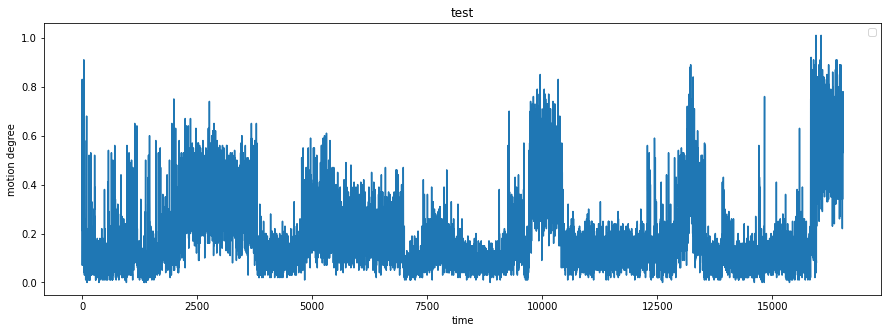

In [9]:
from matplotlib import pyplot as plt

fig= plt.figure(figsize=(15,5))
plt.xlabel("time")
plt.ylabel("motion degree")
plt.title("test")
plt.plot(moving_level_list)
plt.legend()
plt.show()


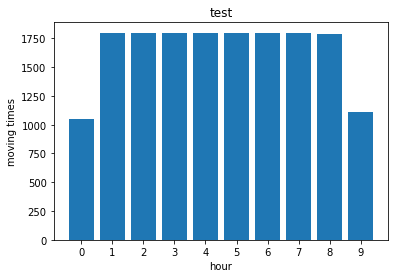

In [8]:
plt.bar(range(len(dic)), list(dic.values()), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.xlabel("hour")
plt.ylabel("moving times")
plt.title("test")
plt.show()

In [ ]:
#Normalized Data

print(score_list)
score_list = np.array(score_list)

normalized = (score_list-min(score_list))/(max(score_list)-min(score_list))

from matplotlib import pyplot as plt

fig= plt.figure(figsize=(15,5))
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("A test graph")
plt.plot(normalized)
plt.legend()
plt.show()

## PhotoHash

In [8]:
image1 = "20210825_t082317"
image2 = "20210825_t082319"

In [10]:
import photohash
import numpy as np
import cv2

path1 = f"D:\\Dementia_Data_Preprocessing\\testing_data\\test_exist\\mask\\{image1}.jpg"
path2  = f"D:\\Dementia_Data_Preprocessing\\testing_data\\test_exist\\mask\\{image2}.jpg"


distance = photohash.distance(path1,path2)
print("distance:",distance)

distance: 1


In [ ]:
import photohash
import numpy as np
import cv2

path1 = "D:/final.png"
path2  = "D:/final2.png"
distance = photohash.distance(path1,path2)
print("distance:",distance)

## run path

In [ ]:
import os
import cv2
import numpy as np
import photohash



directory_name = r"D:\Dementia_Data_Preprocessing\testing_data\mask\4"


list_A = []
list_B = []
num = 0
count = 0
for filename in os.listdir(directory_name):

    num = num+1
    
    if (num % 2) == 0:
        list_B = []      
        list_B.append(filename)
       
    else:
        list_A = [] 
        list_A.append(filename)
    
    if len(list_A) != 0 and len(list_B) != 0:
        
        a = directory_name + "\\" + list_A[0]
        b = directory_name + "\\" + list_B[0]
        distance = photohash.distance(a,b)
        
        if distance >= 0:
            c = (list_A[0],list_B[0],f"distance: {distance}")
            print(c)
            count = count+1
            
        
    else:
        continue

print(" ")
print("detect moving times:", count)

## PhotoHash vs SSIM

In [ ]:
import photohash
import numpy as np
import cv2
from skimage.metrics import structural_similarity

path1 = r"D:\Dementia_Data_Preprocessing\main\out_image\20210825_t021112.jpg"
path2  = r"D:\Dementia_Data_Preprocessing\main\out_image\20210825_t021110.jpg"

distance = photohash.distance(path1,path2)
print("distance:",distance)


b = cv2.imread(path1)
c = cv2.imread(path2)

(score, diff) = structural_similarity(b,c, full=True,multichannel=True)
print("SSIM: {}".format(score))

## dhash

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_phash(s_img_url):
    np_lena_img = cv2.imread(s_img_url, cv2.IMREAD_UNCHANGED)

    # 缩放为32x32图片
    np_lena_img_resize = cv2.resize(np_lena_img ,(32, 32), cv2.INTER_AREA)

    # RGB三通道转为灰度图
    #np_lena_img_gray = cv2.cvtColor(np_lena_img_resize, cv2.COLOR_BGR2GRAY)

    # 进行DCT变换
    np_lena_img_dct = cv2.dct(np.float32(np_lena_img_resize))

    # 取低频dct部分
    np_lena_img_dct_low_freq = np_lena_img_dct[0:8, 0:8]

    # 计算8x8灰度矩阵的均值
    a = np.mean(np_lena_img_dct_low_freq)

    # 根据均值得到hash值
    diff = np_lena_img_dct_low_freq > a
    phash_bi = ''.join(str(b) for b in 1 * diff.flatten())
    phash_hex = '{:0>{width}x}'.format(int(phash_bi, 2), width=16)
    return phash_bi, phash_hex

def get_hanming(s_hash_a, s_hash_b):
    if len(s_hash_a) != len(s_hash_b):
        print("two hash dim is not same!")
        return 100000000

    n_hanmming = 0
    for i in range(len(s_hash_a)):
        if s_hash_a[i] != s_hash_b[i]:
            n_hanmming += 1
    return  n_hanmming


if __name__ == "__main__":
    s_img_url_a = path1
    s_img_url_b = path2
    
    phash_bi_a, phash_hex_a = get_phash(s_img_url_a)
    print("Lenna(origin).png")
    print(phash_bi_a, phash_hex_a)
    print()

    phash_bi_b, phash_hex_b = get_phash(s_img_url_b)
    print("Lenna(noise).png")
    print(phash_bi_b, phash_hex_b)
    print()

    print("hanming Lenna(origin) vs Lenna(noise)")
    print(get_hanming(phash_bi_a, phash_bi_b) )
    print()
